In [44]:
# Imported libraries
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib as mpl
import imageio
import cv2
import sys
import os
import pickle

In [45]:
def downSample(pickle_file):
    final_patient_data = []
    seg_final_array = []
    original_seg_array = pickle_file[4]
    for scan in range(len(pickle_file)):
        scan_seg = []
        if scan != 4:
            scan_type_array = []
            array_seg = []
            for array in range(len(pickle_file[scan])):
                new_array = cv2.resize(pickle_file[scan][array], dsize=(256,256), interpolation=cv2.INTER_CUBIC)
                scan_type_array.append(new_array)
                designated_seg_arr = original_seg_array[scan][:,:,array]
                resized_seg = cv2.resize(designated_seg_arr, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
                array_seg.append(resized_seg)
            seg_final_array.append(array_seg)
            final_patient_data.append(scan_type_array)
    final_patient_data.append(seg_final_array)
    return final_patient_data

In [46]:
# Taking file 'TCGA-06-0179.pickle' as a benchmark to start from
path_to_pickles = '/home/omar/Desktop/TrainingResult_dup/'
file = 'TCGA-06-0179.pickle'
patient = open("%s" % (path_to_pickles+file), "rb")
patient_data_test = pickle.load(patient)


result_dir = '/home/omar/Desktop/new_dsample/'
os.chdir(result_dir)

patient_array = patient_data_test
pickle_file = open("%s" % (file) ,"wb")
final_data = downSample(patient_array)
pickle.dump(final_data,pickle_file)
pickle_file.close()

# print(patient_data[4][0][:,:,0].shape)
# new_array = np.resize(patient_data[0][0], (256,256)) ---> Failed miserably
# new_array = cv2.resize(patient_data[0][0], dsize=(256, 256), interpolation=cv2.INTER_CUBIC)


In [5]:
# Testing the downsample function
# result_dir = '/home/omar/Desktop/new_dsample/'
# os.chdir(result_dir)
# pickle_file = open("%s" % (path_to_pickles + file) ,"wb")

# final_data = downSample(patient_data_test)
# pickle.dump(final_data,pickle_file)
# pickle_file.close()


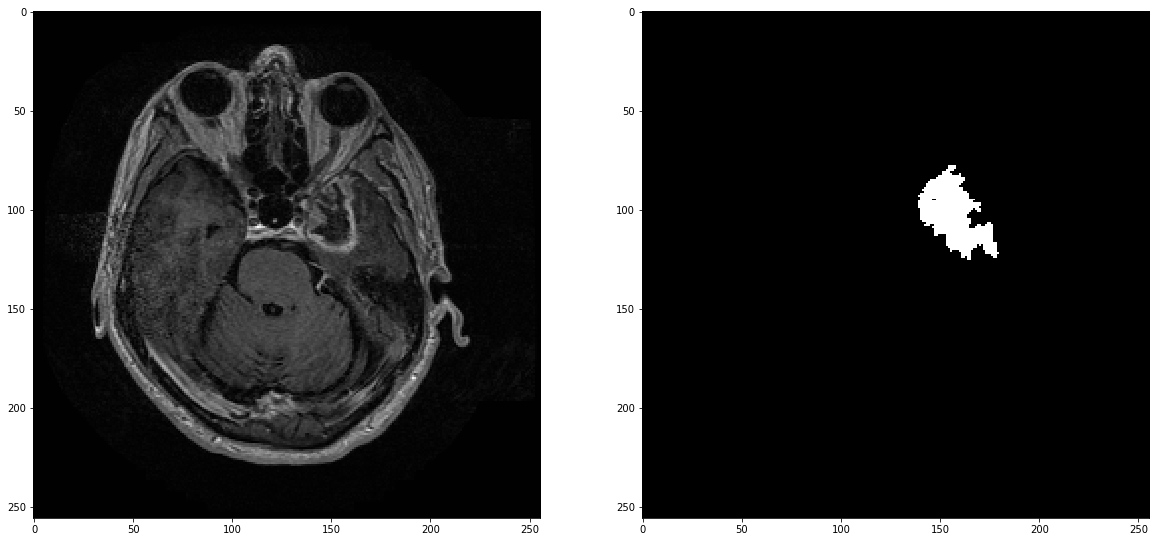

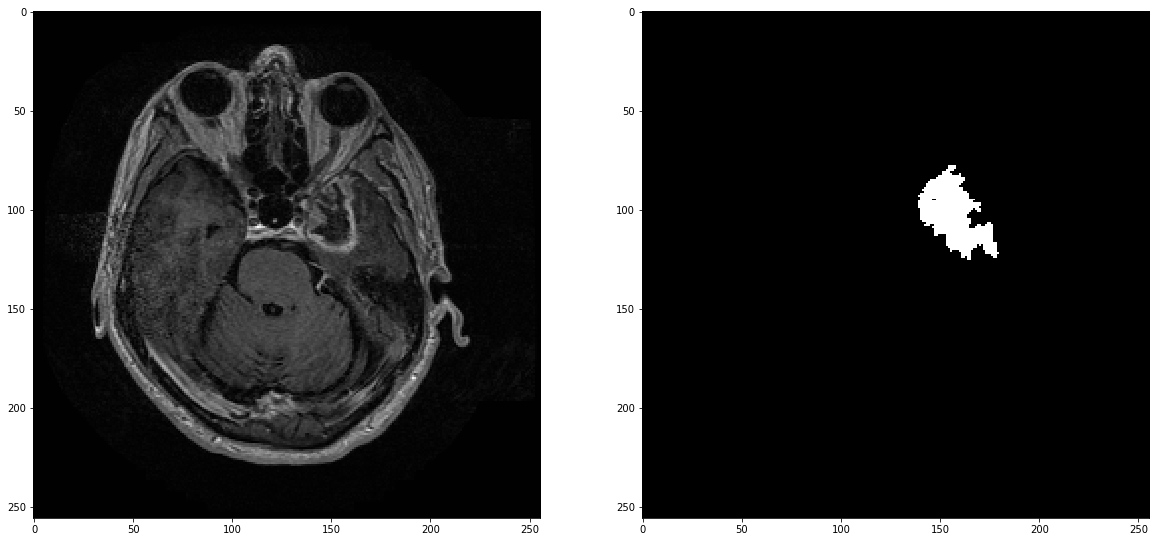

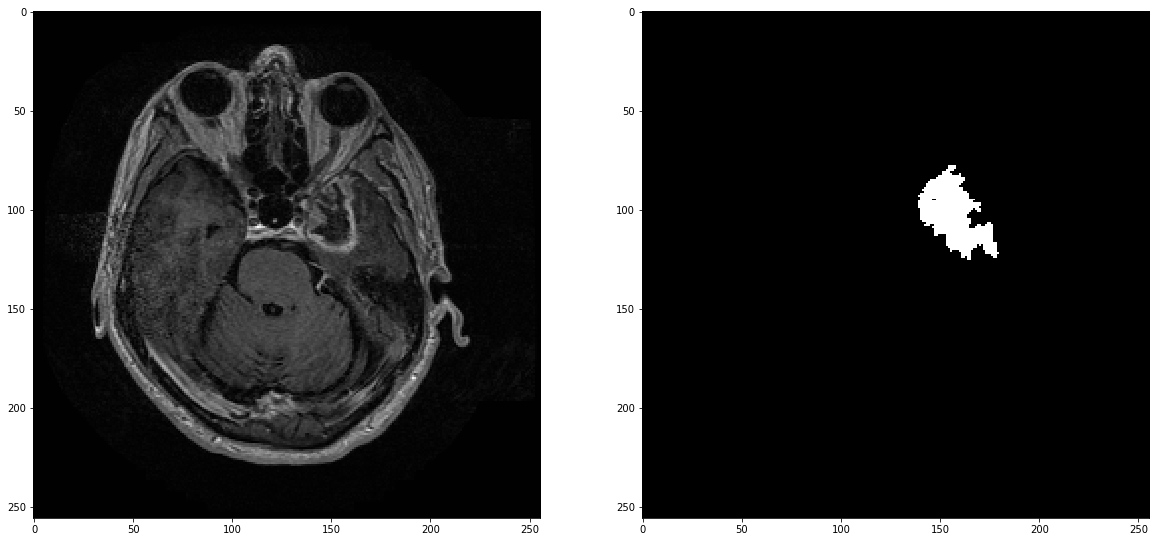

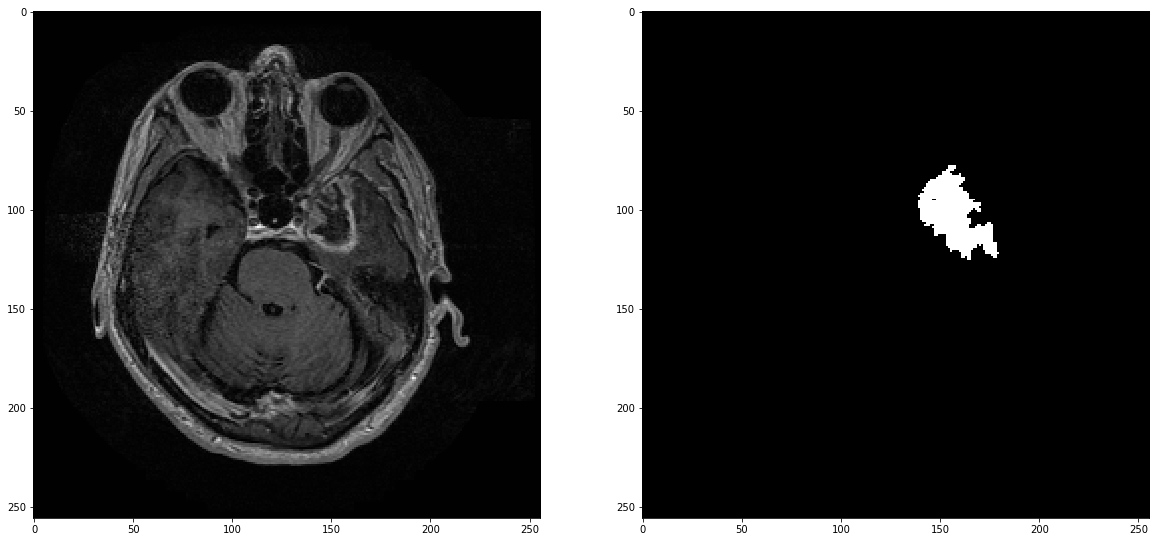

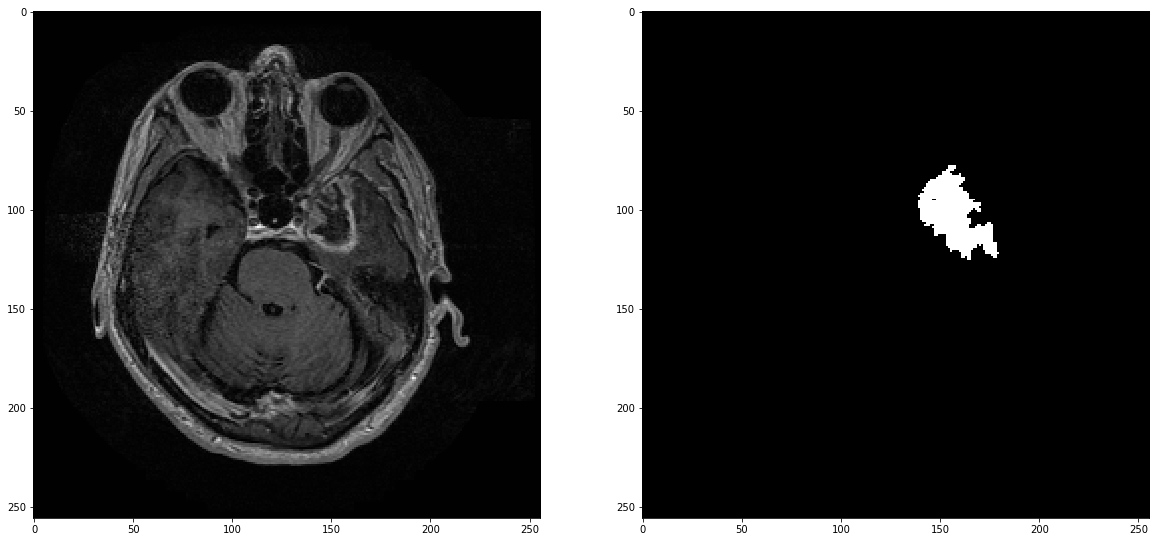

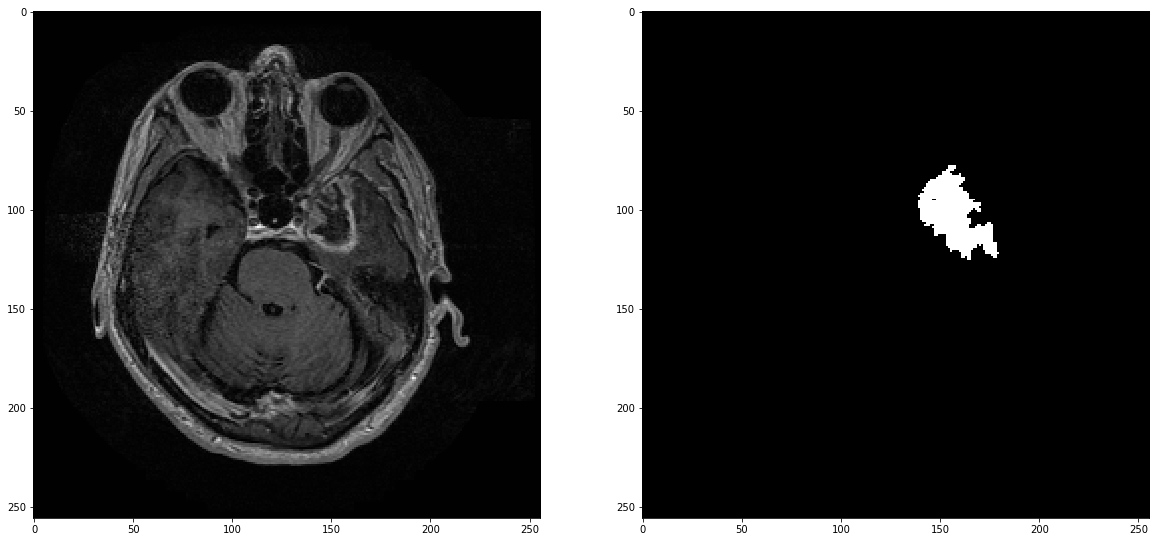

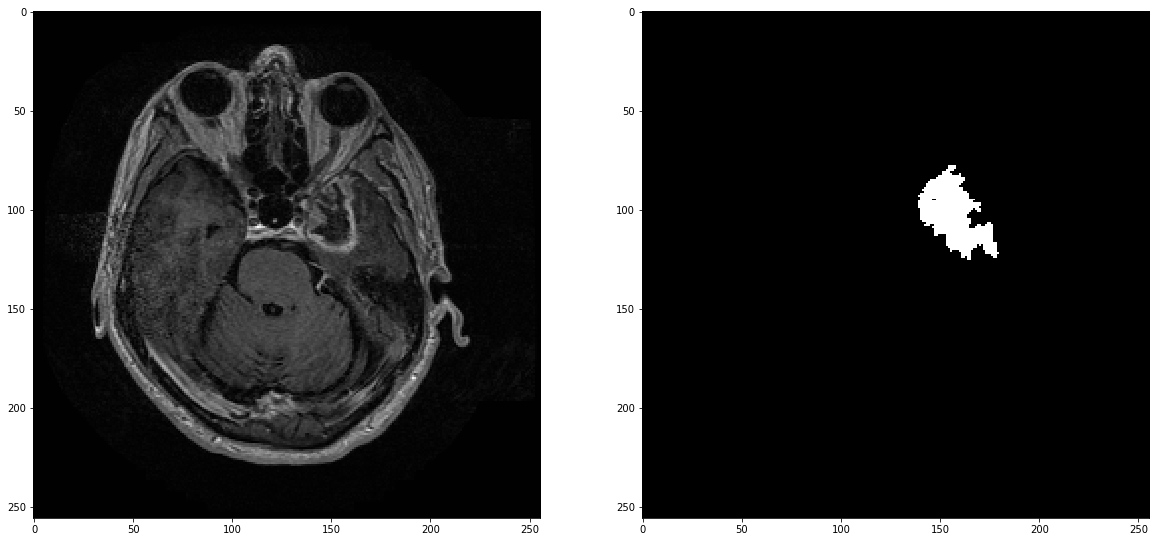

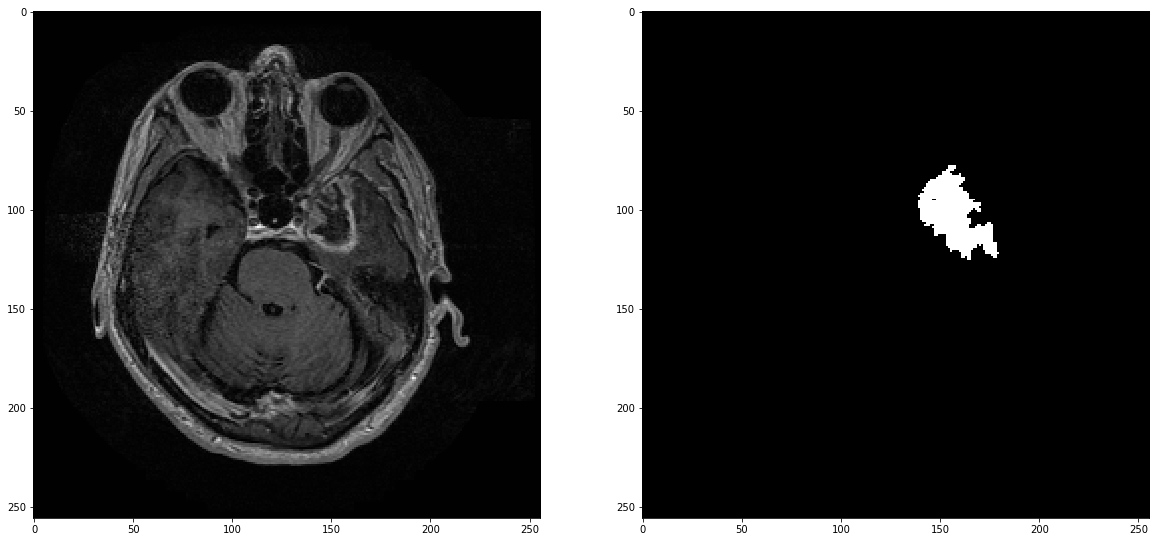

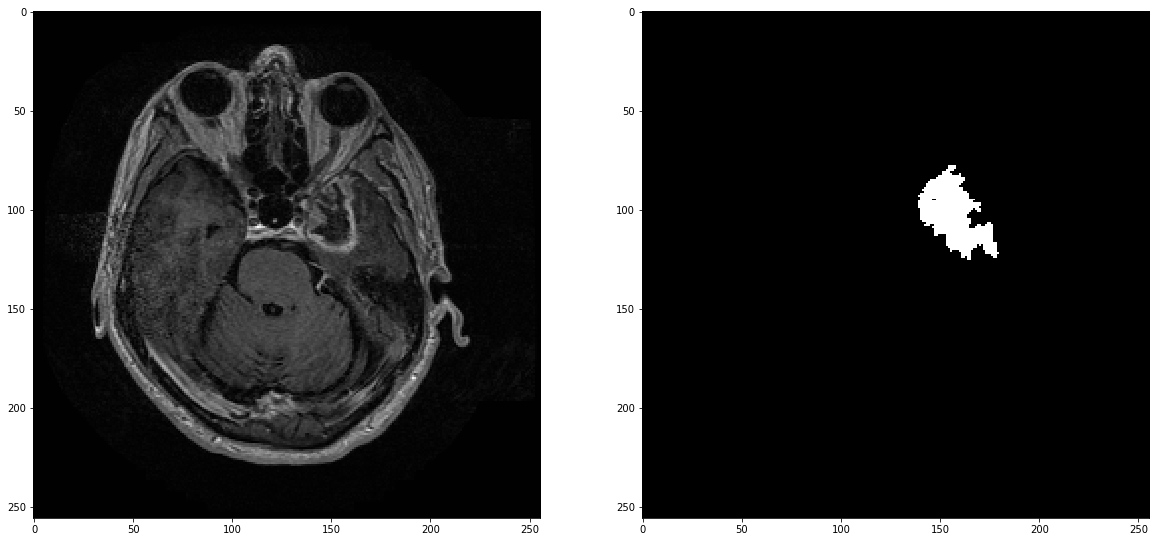

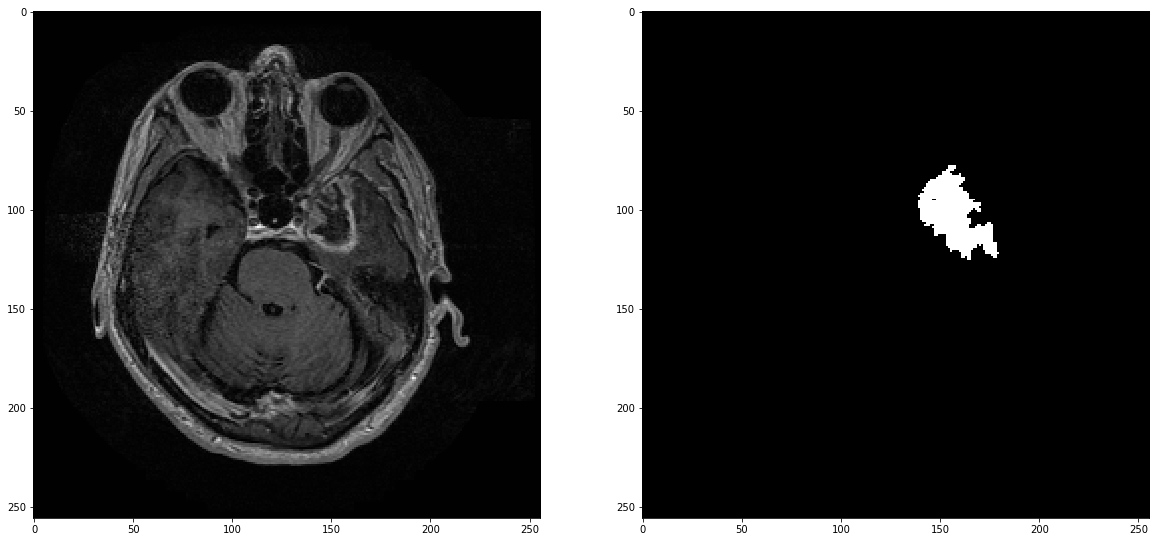

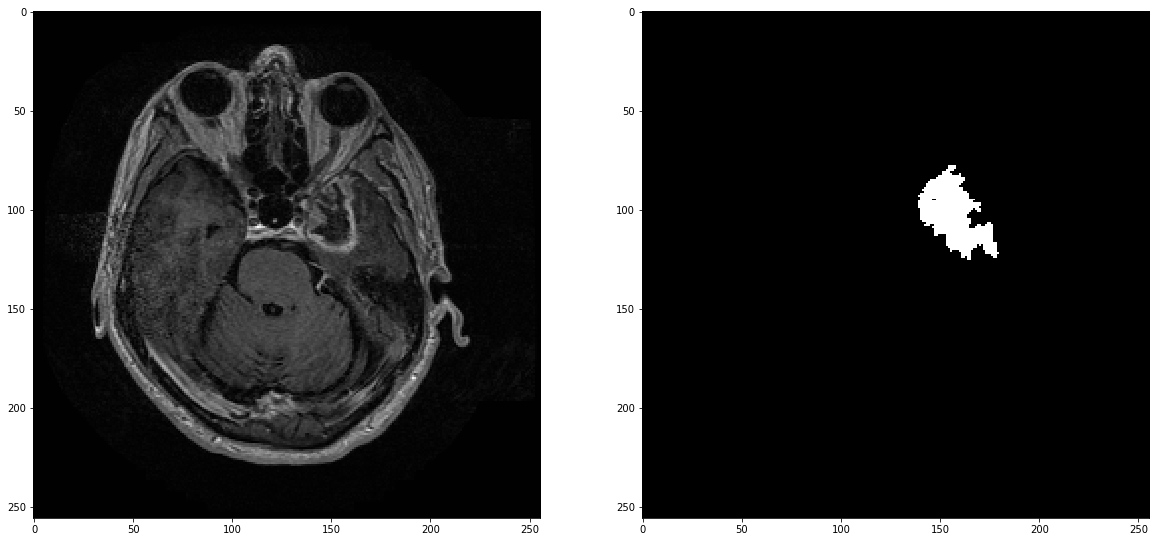

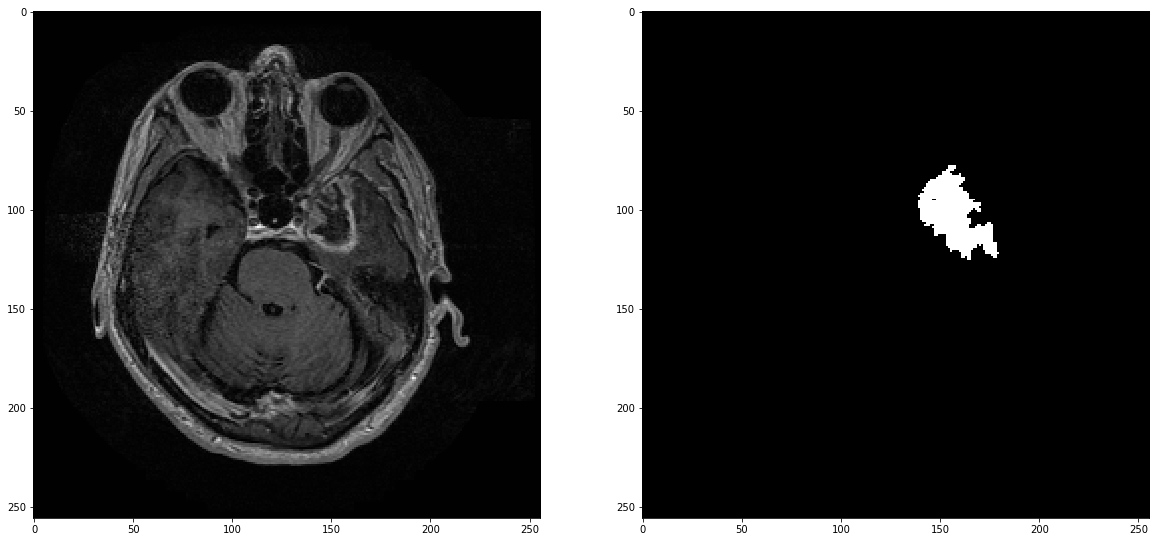

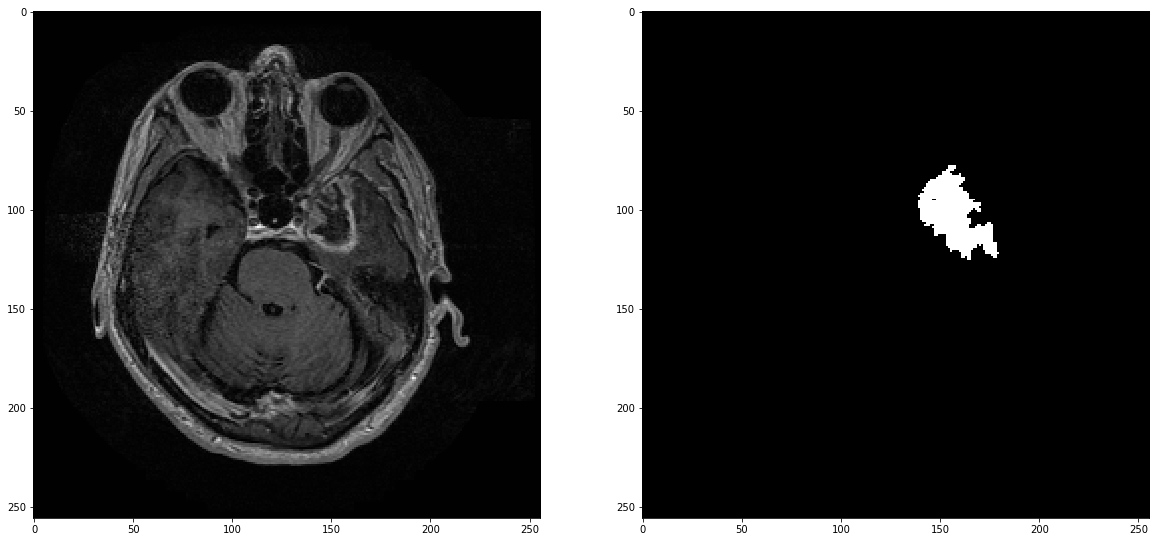

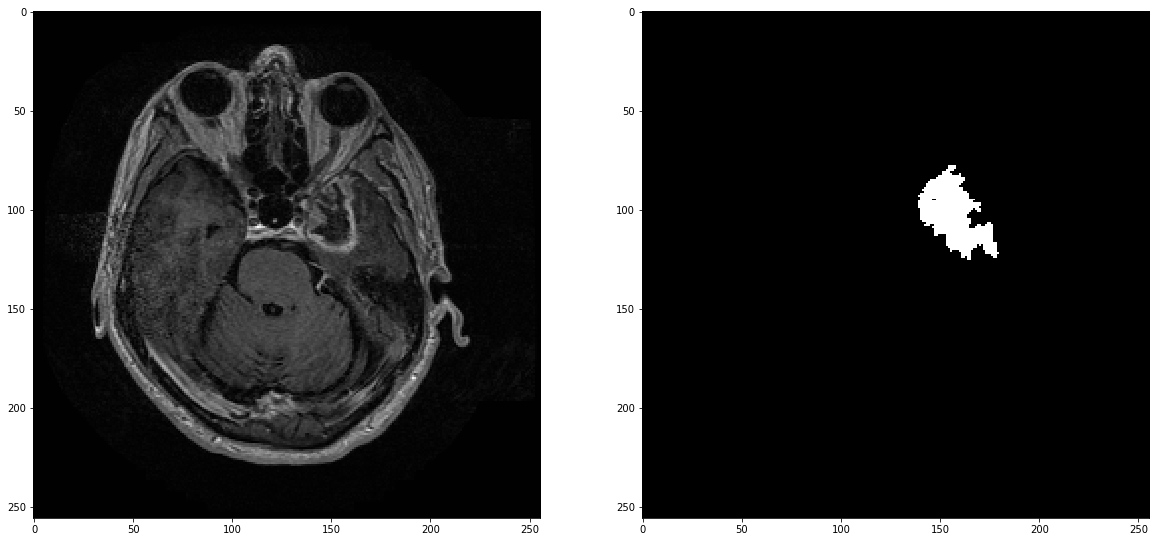

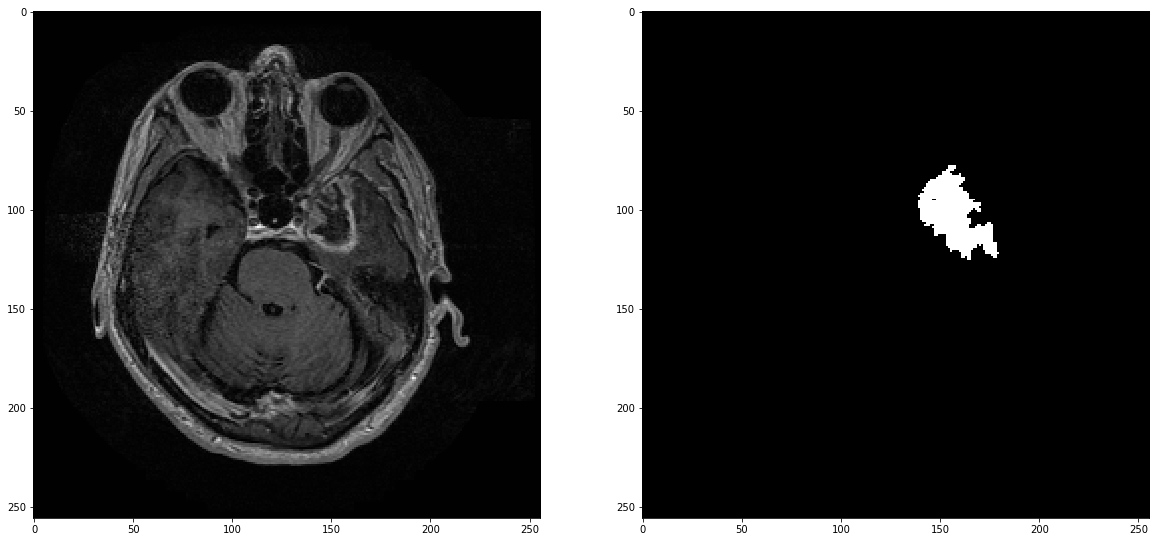

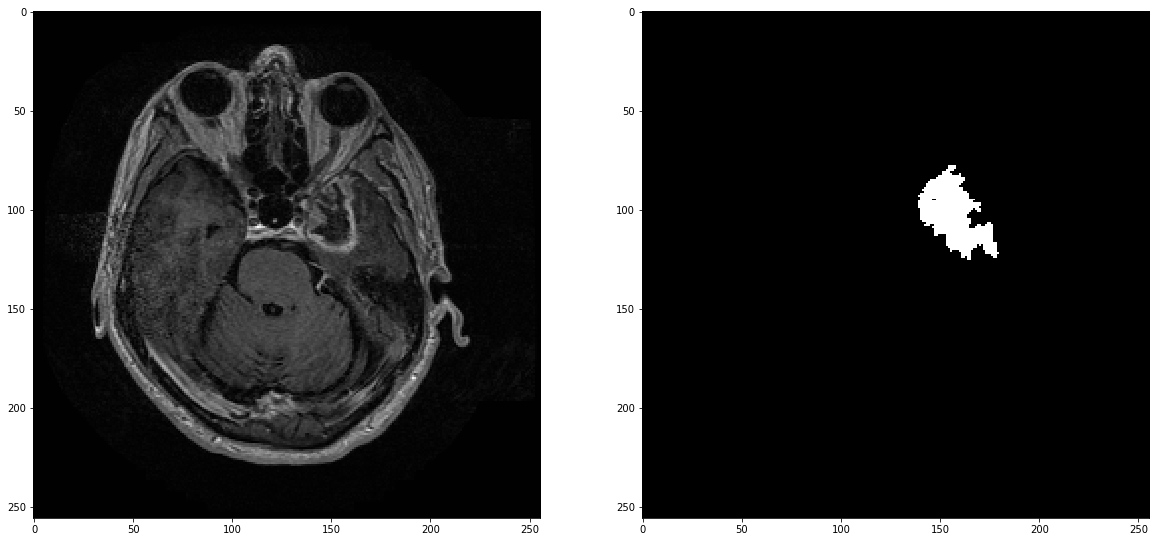

/home/omar/.local/lib/python3.6/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


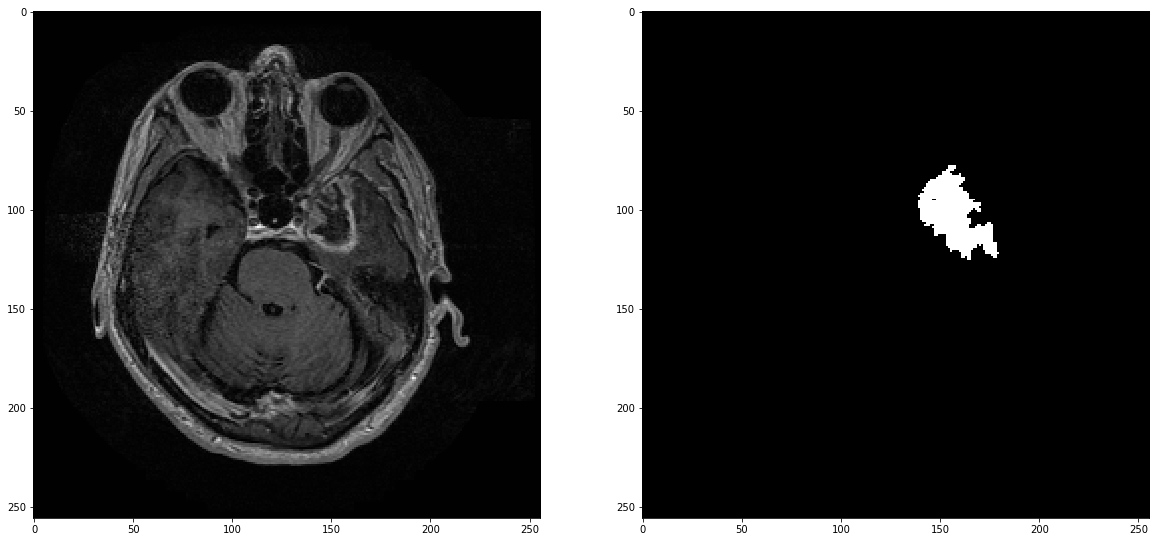

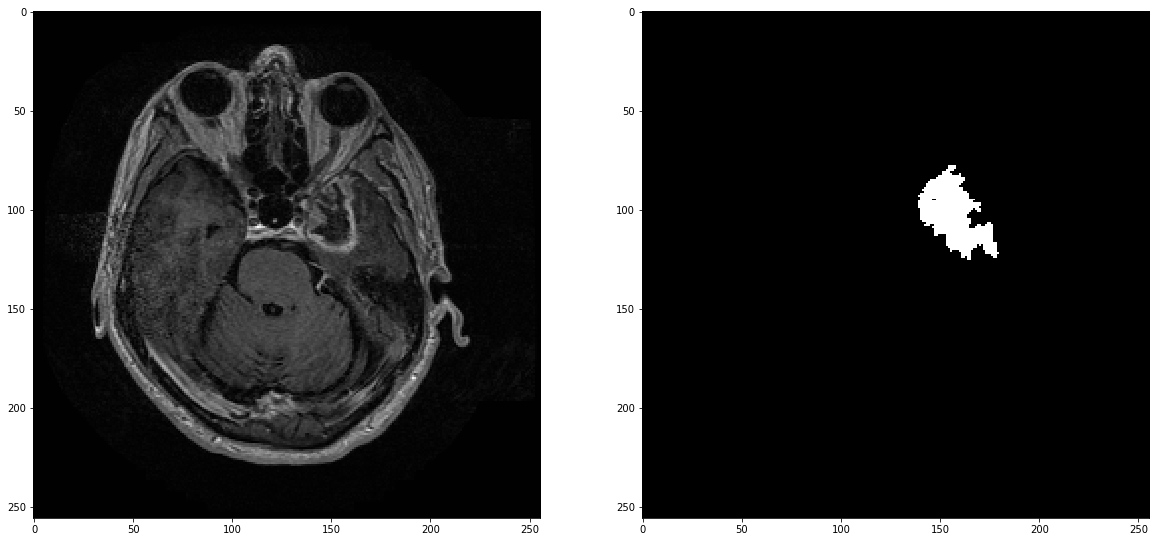

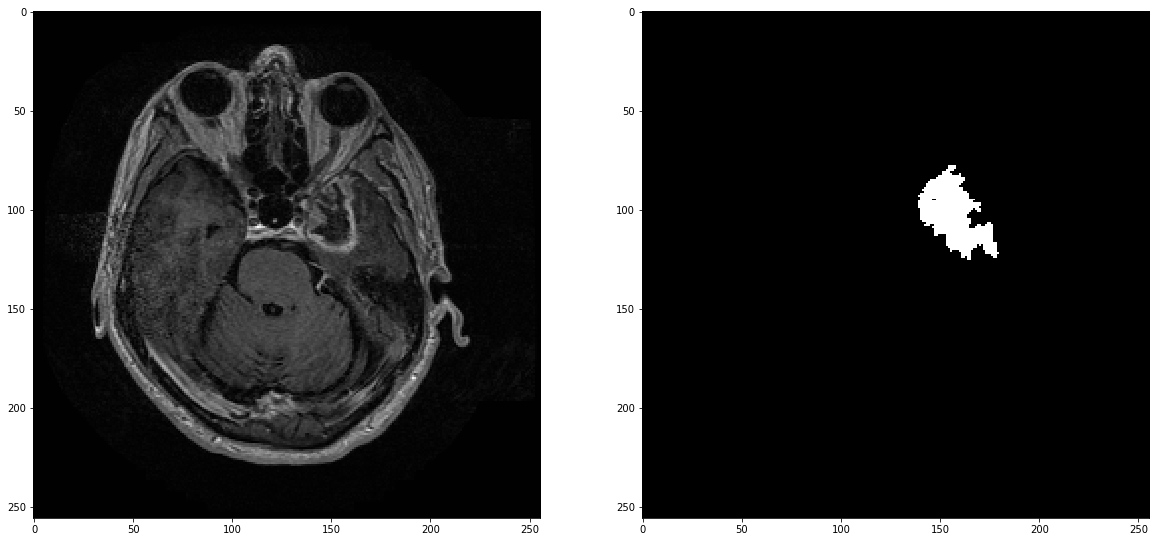

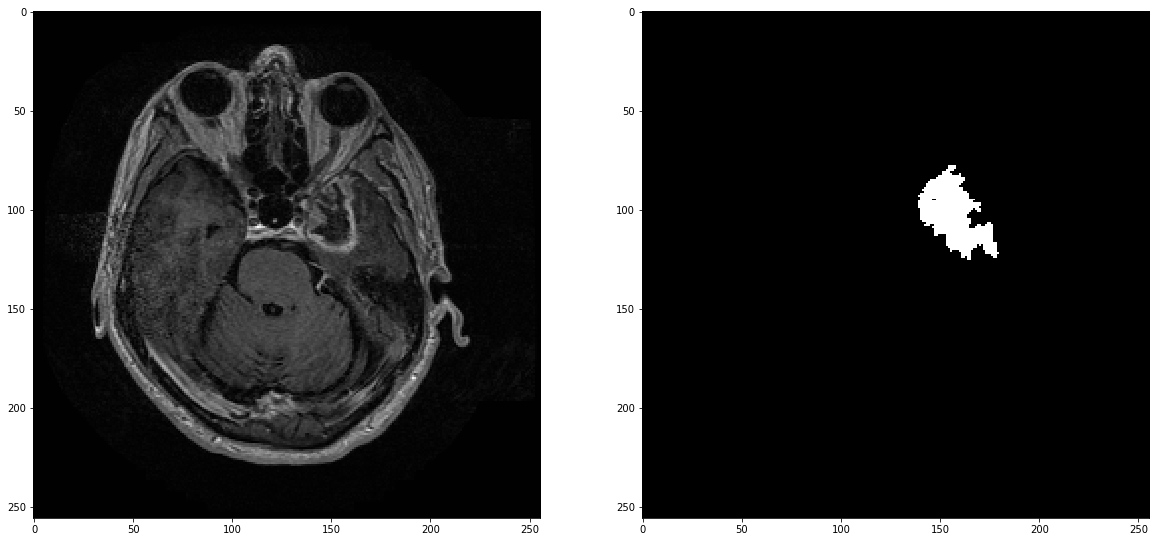

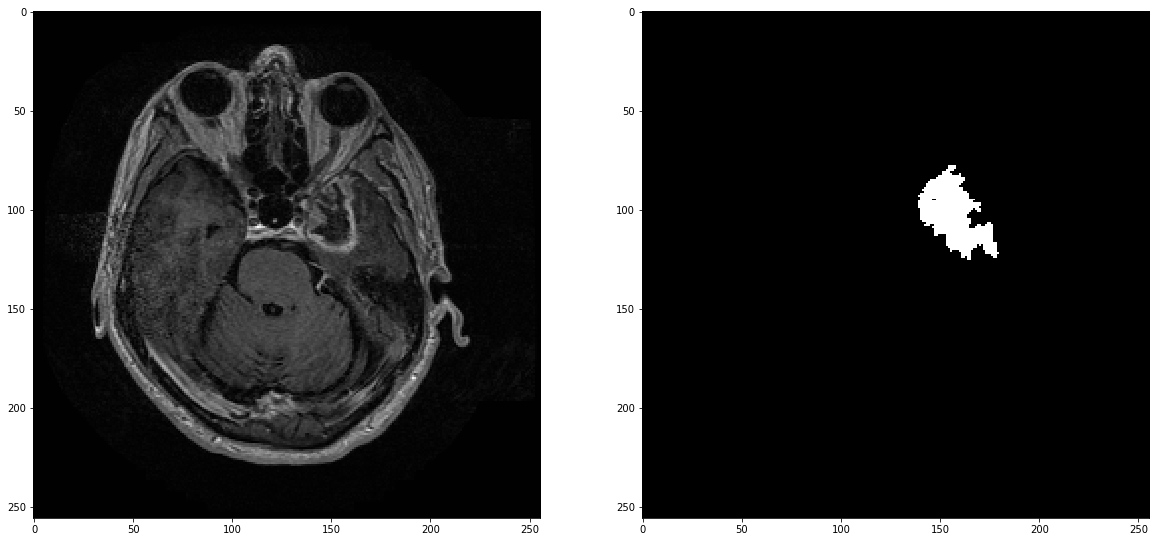

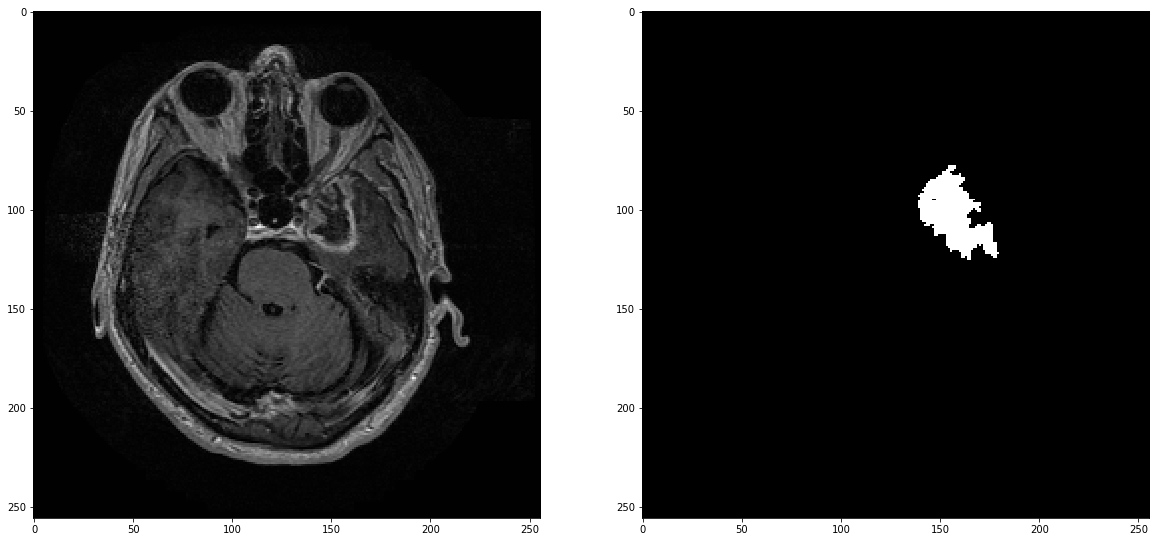

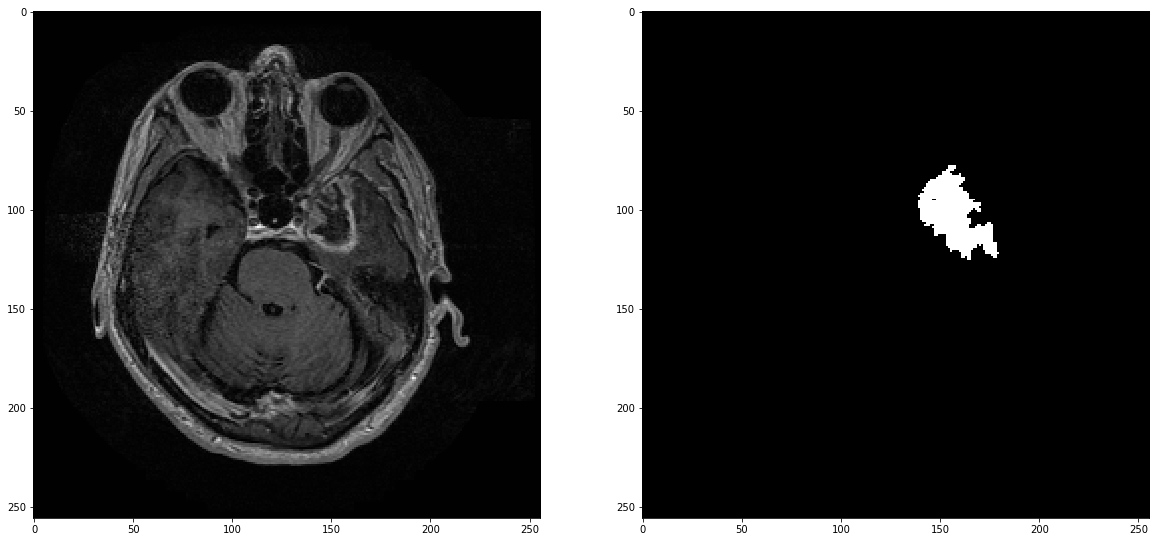

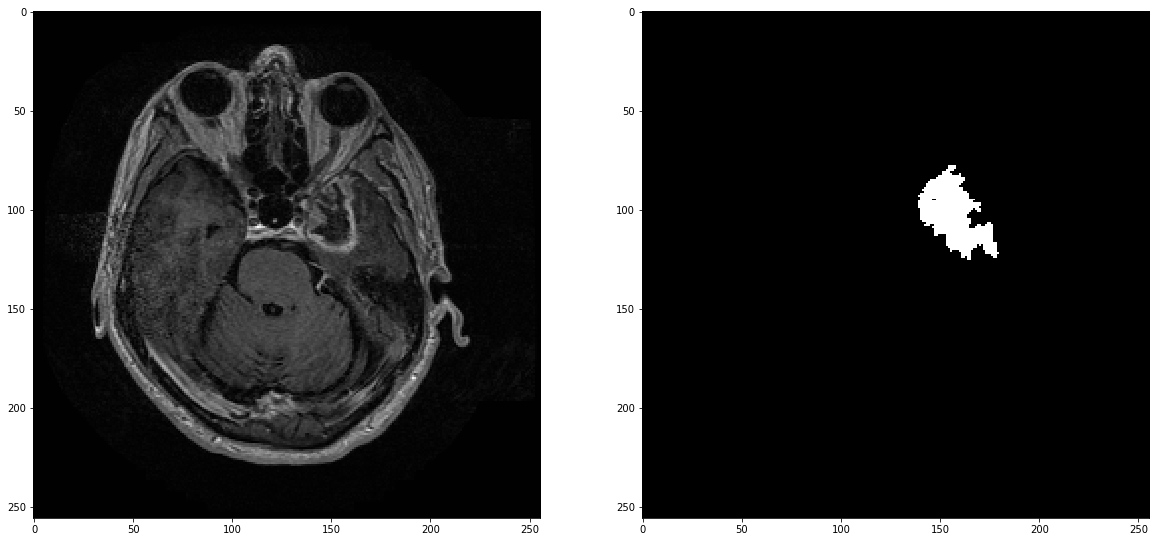

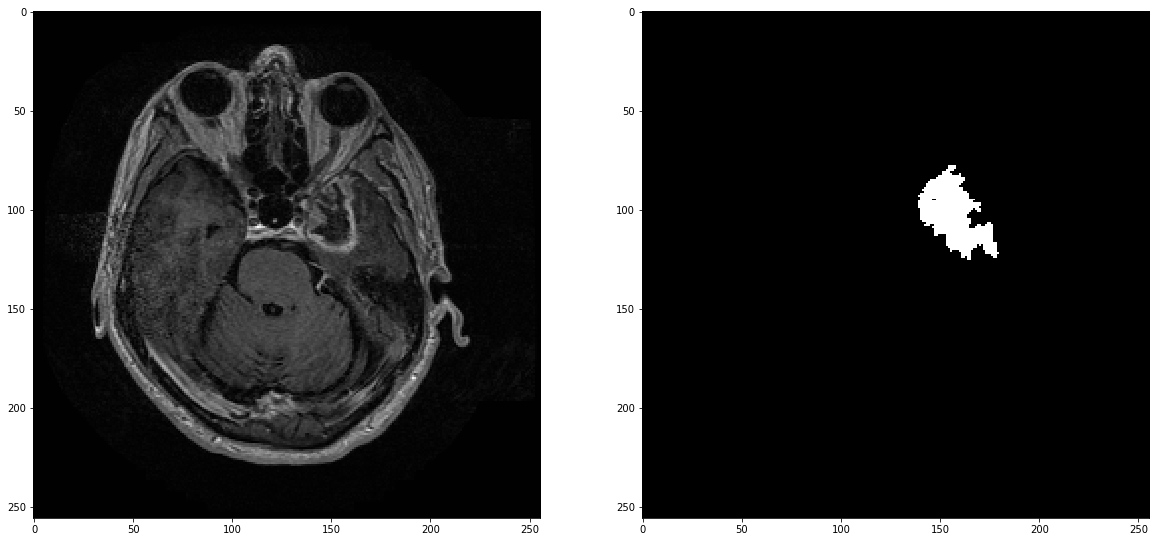

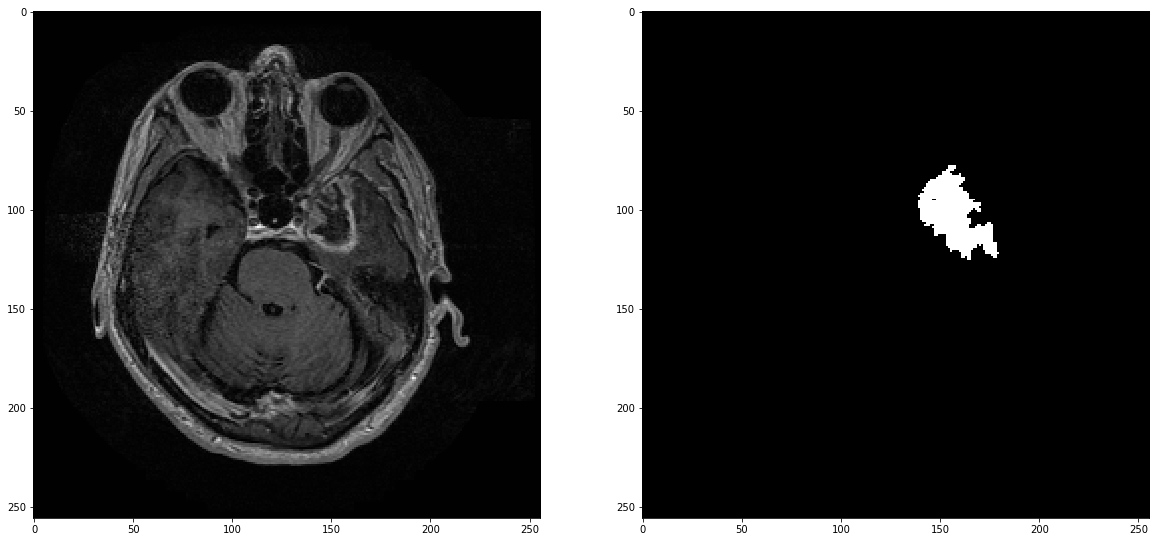

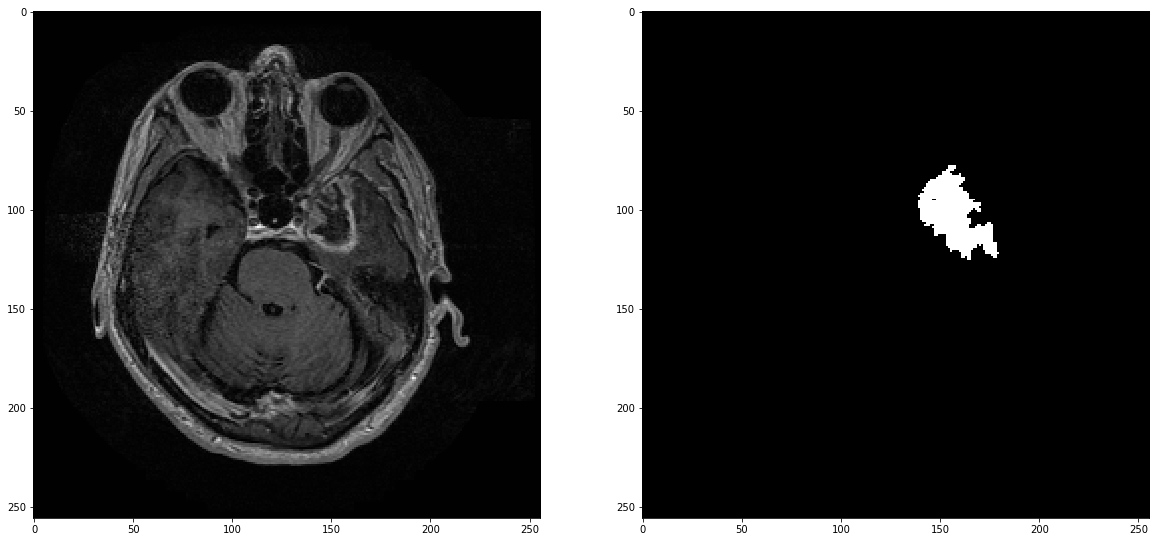

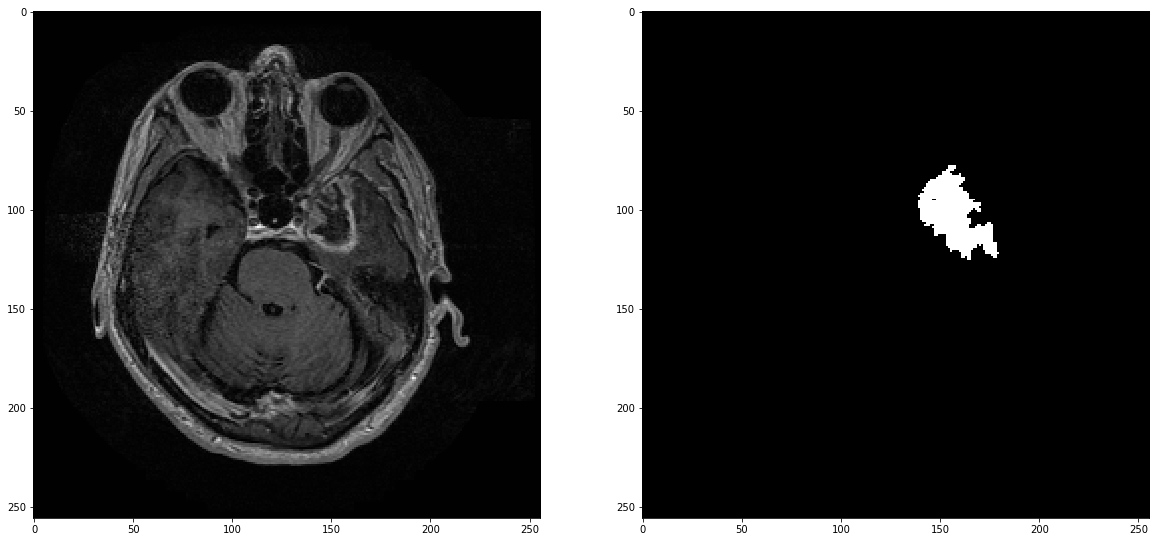

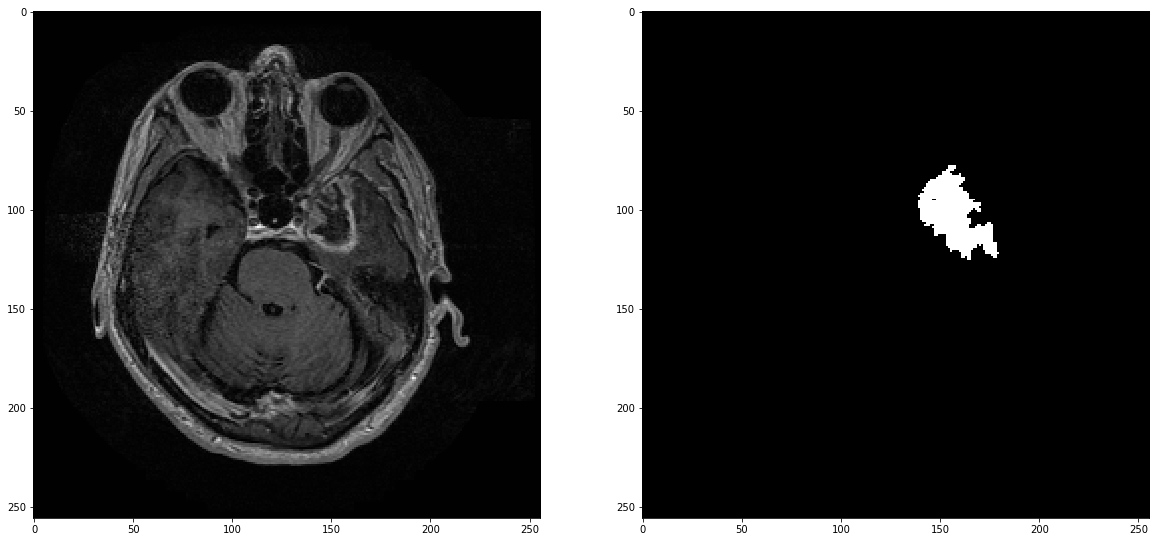

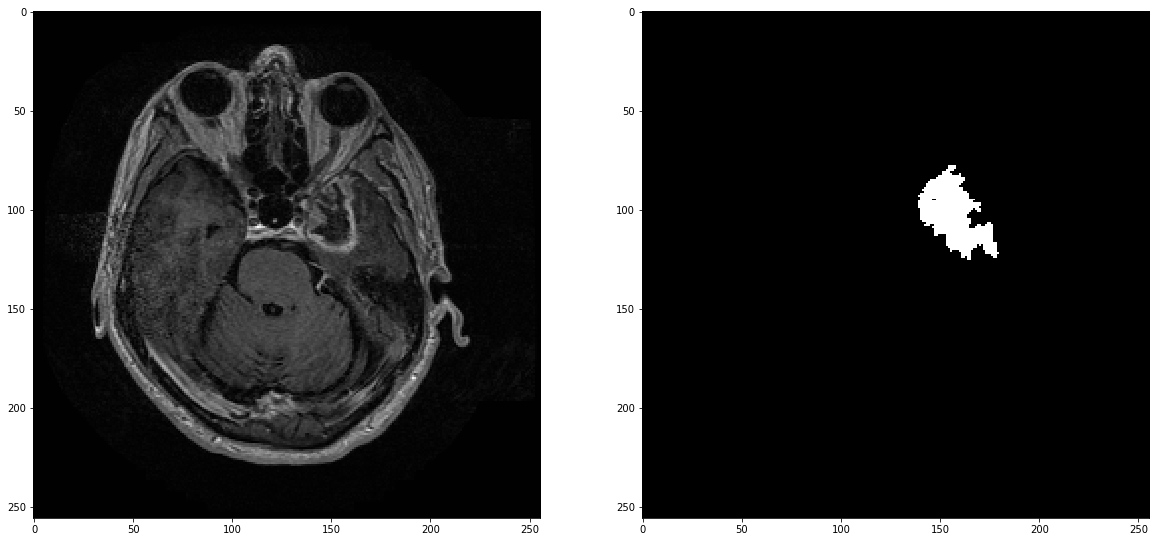

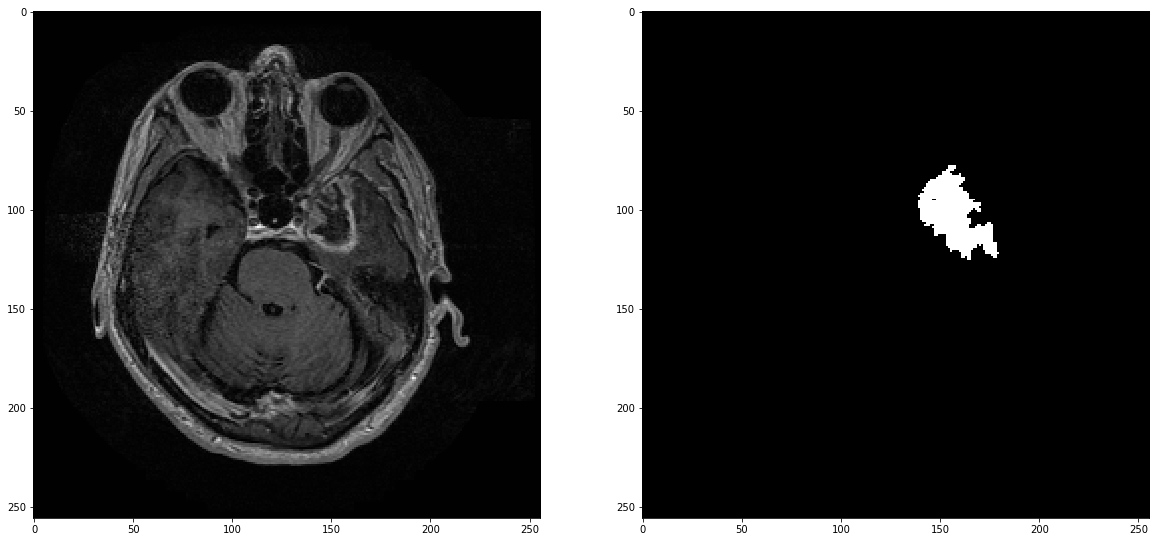

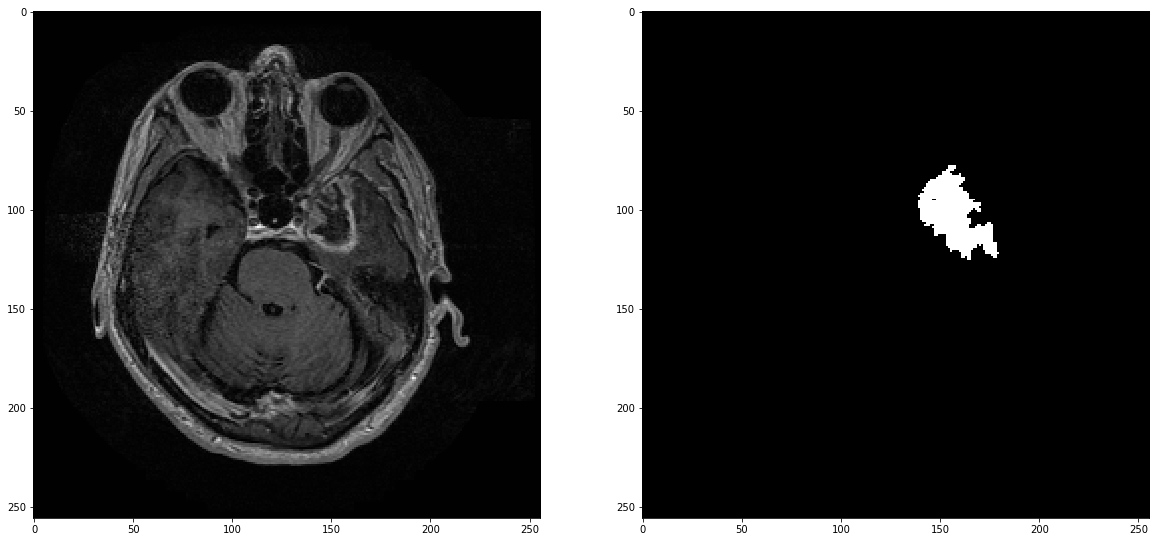

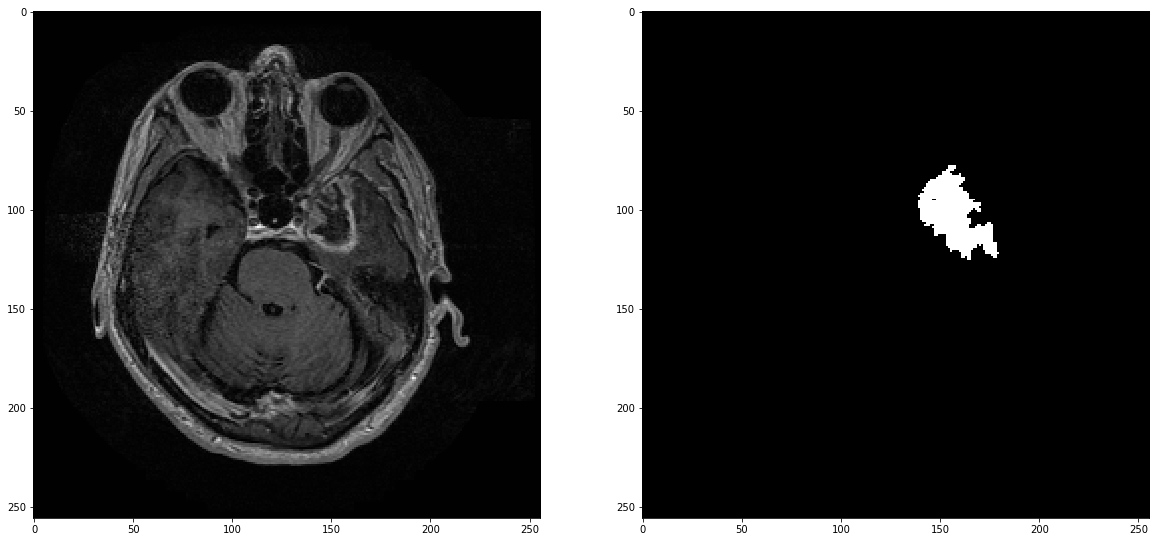

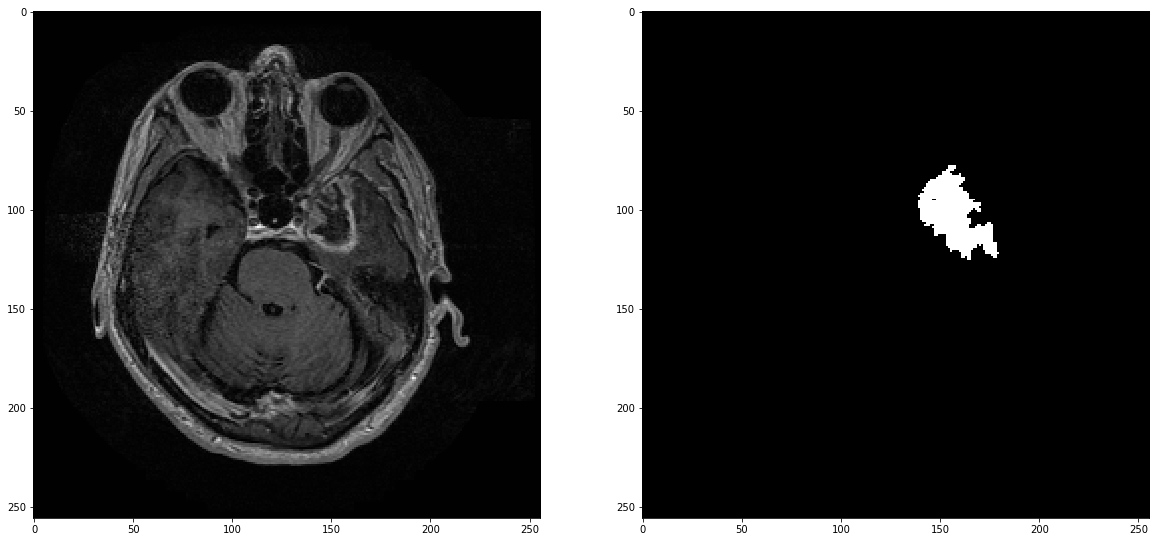

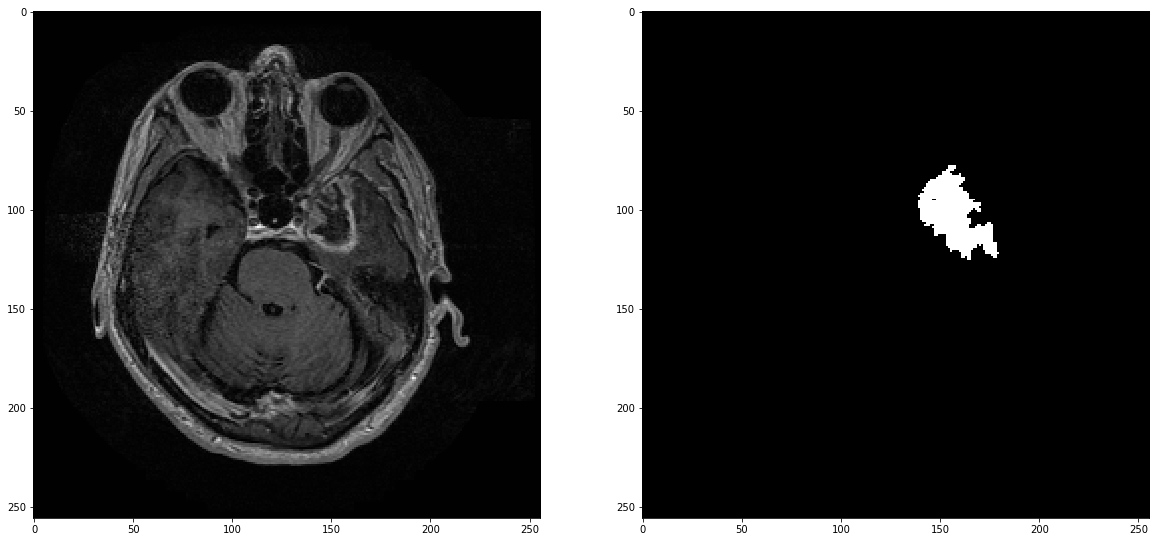

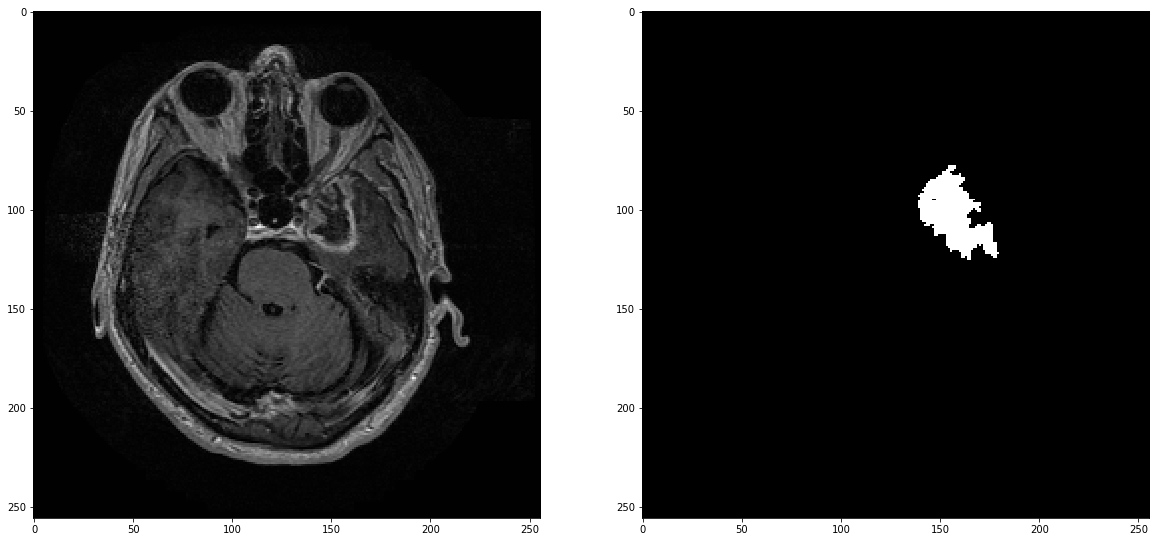

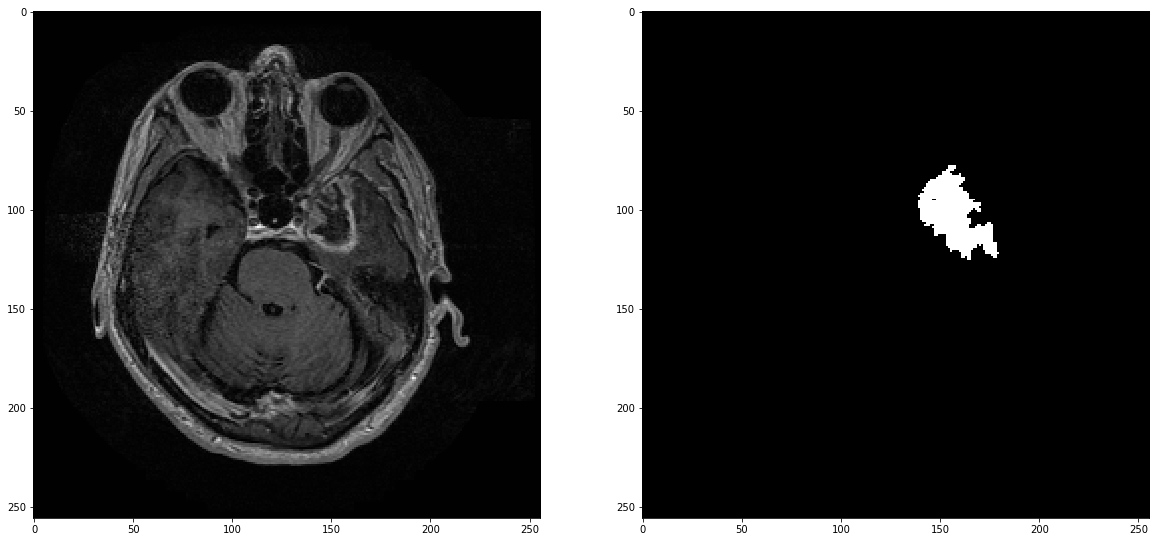

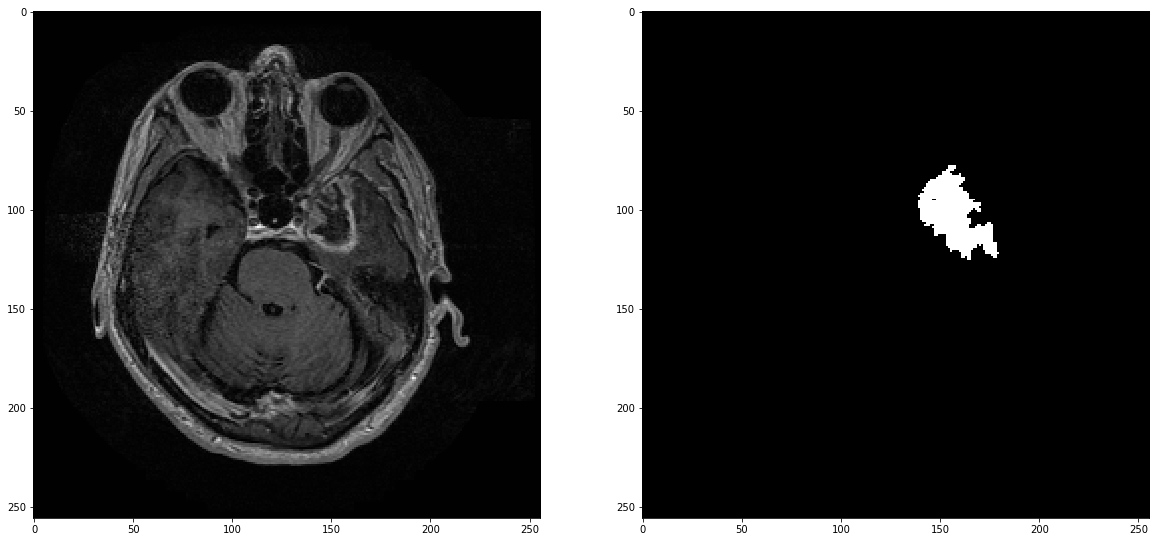

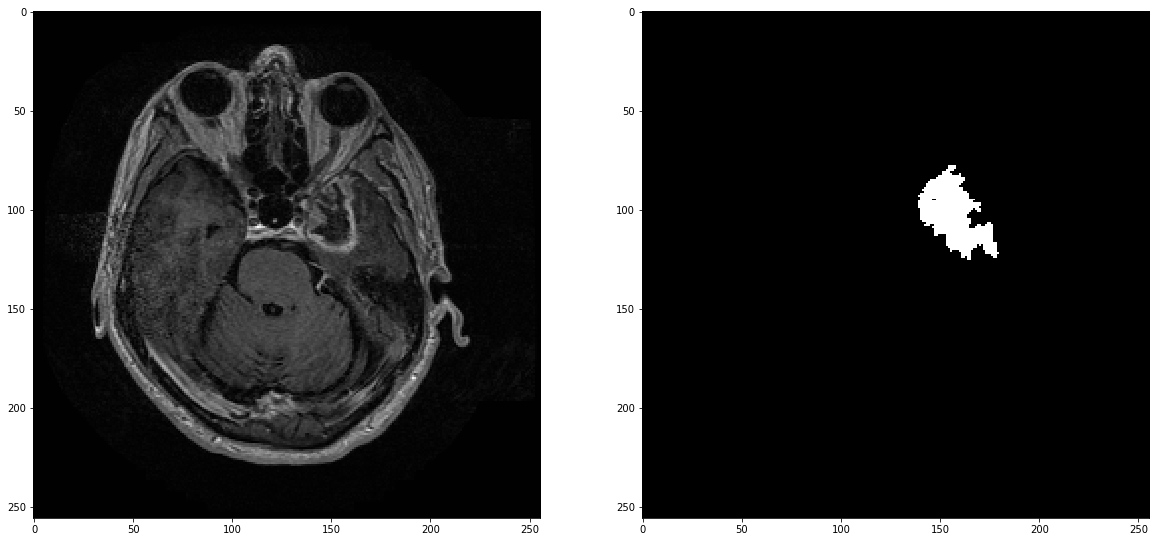

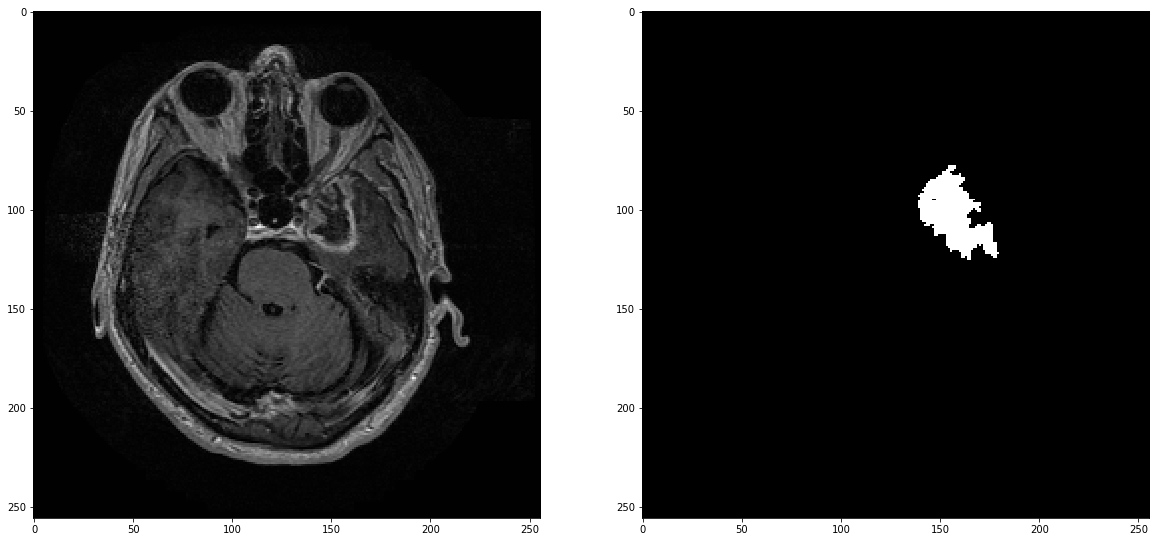

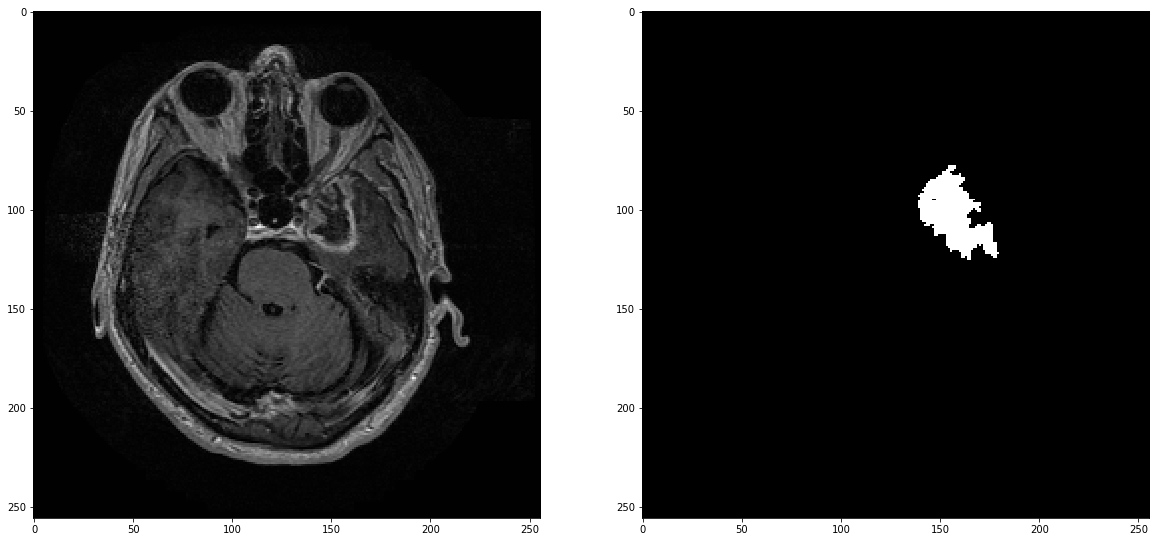

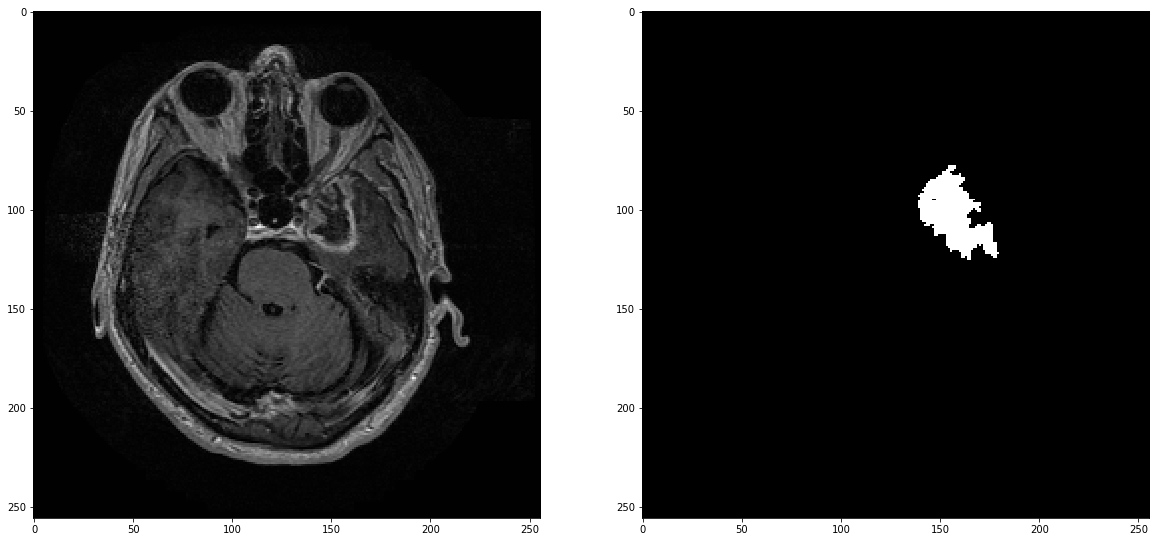

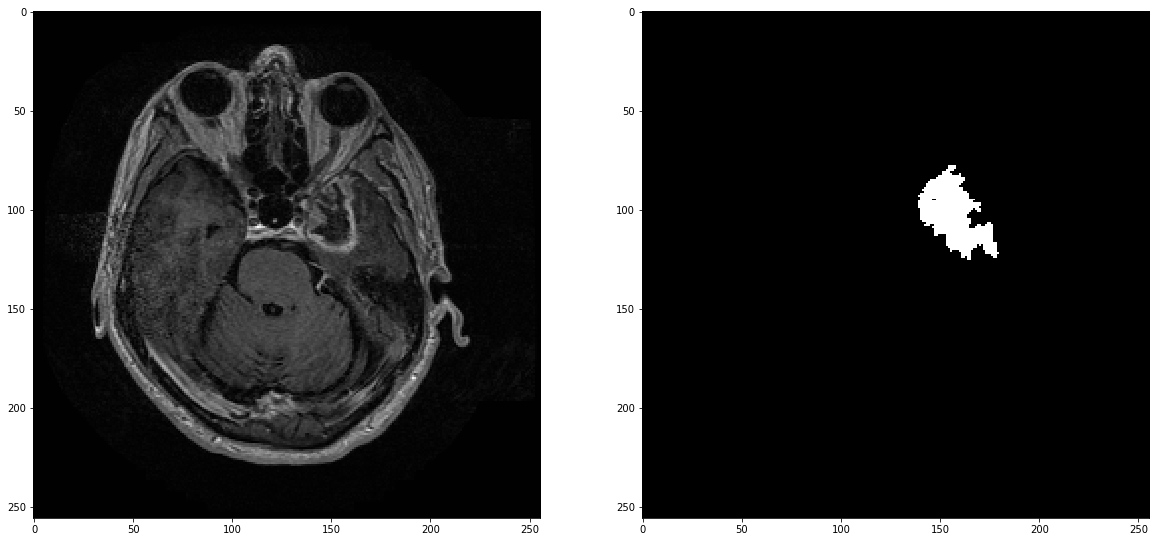

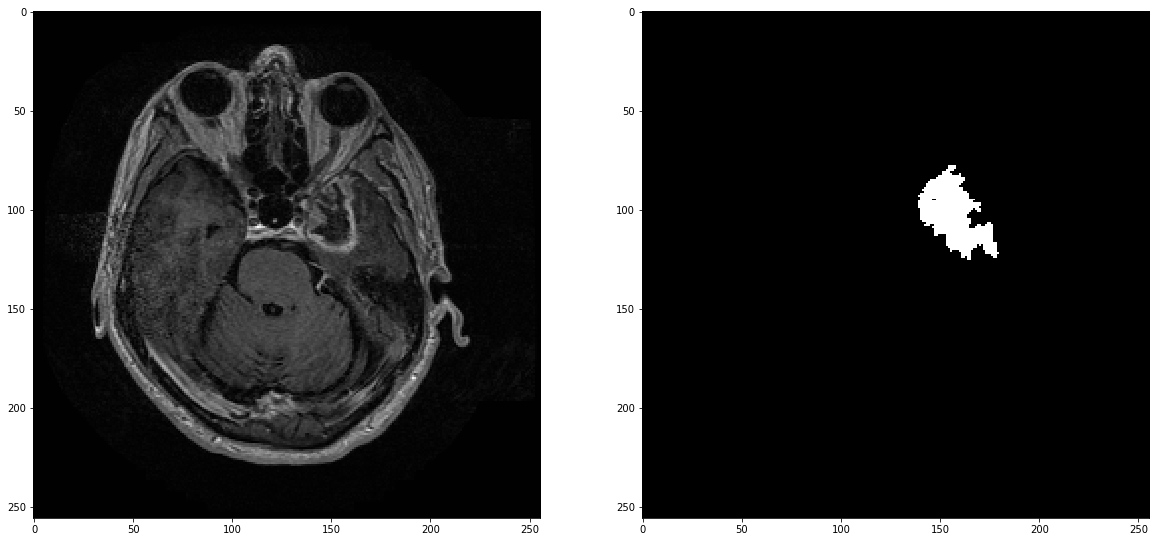

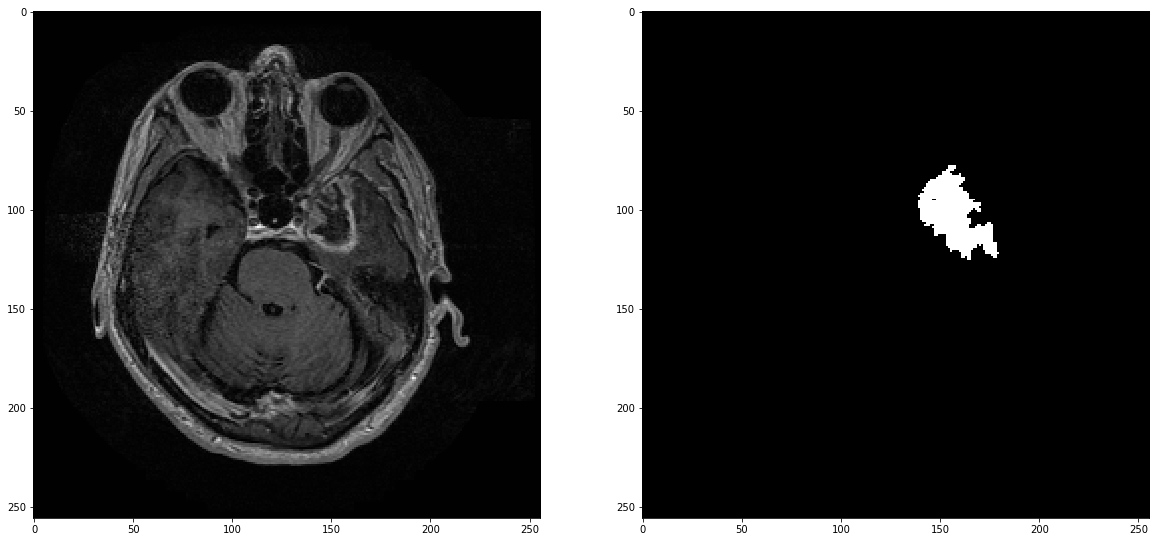

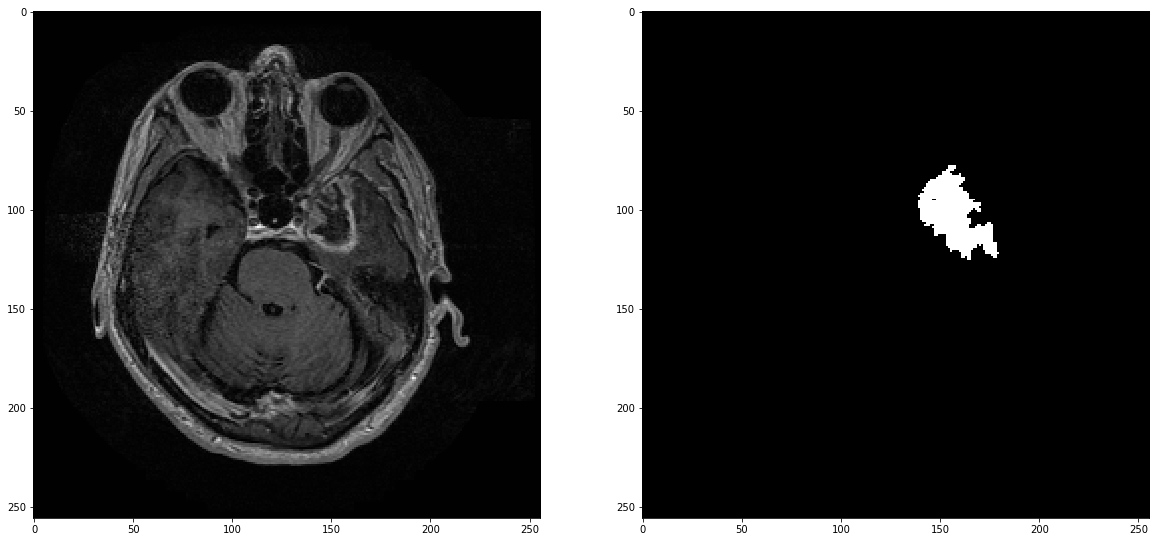

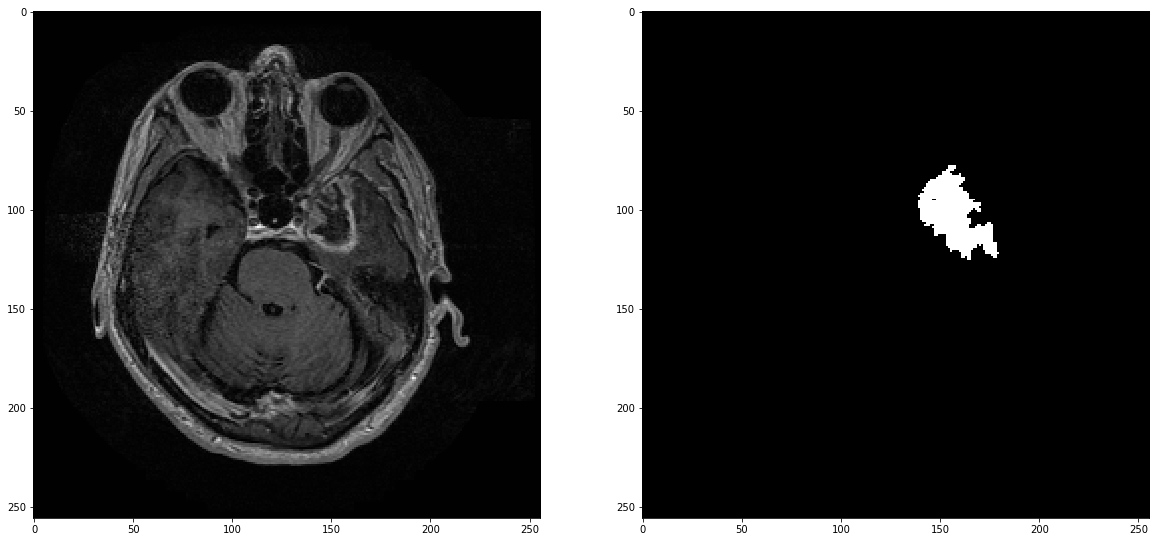

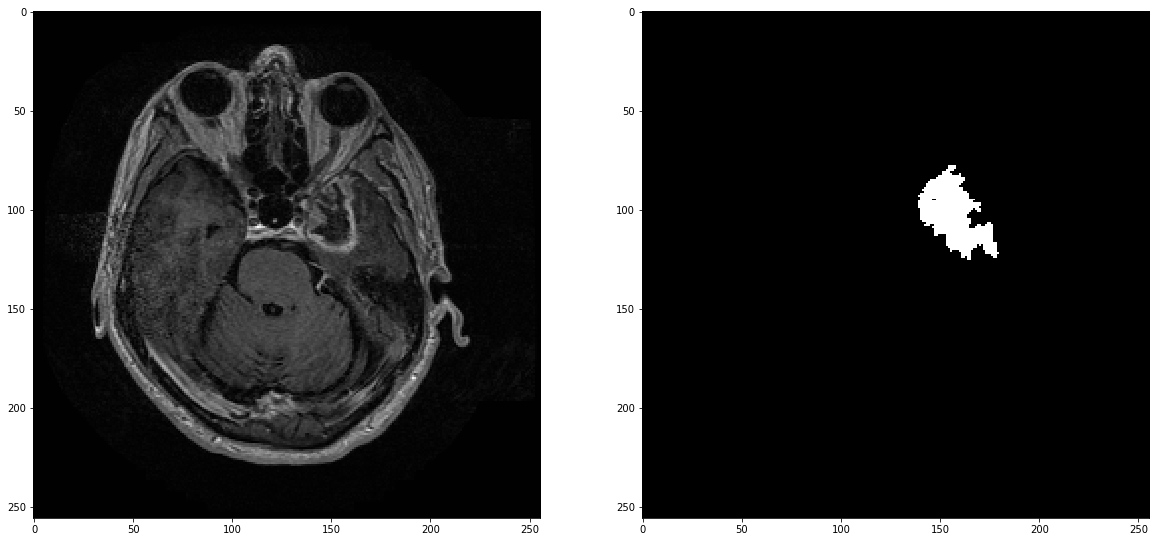

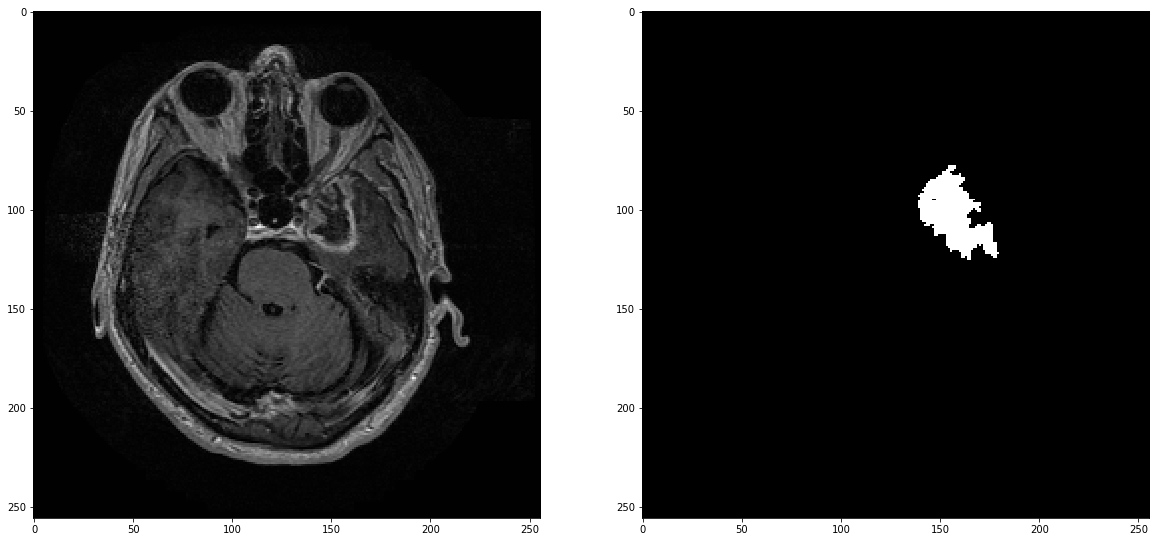

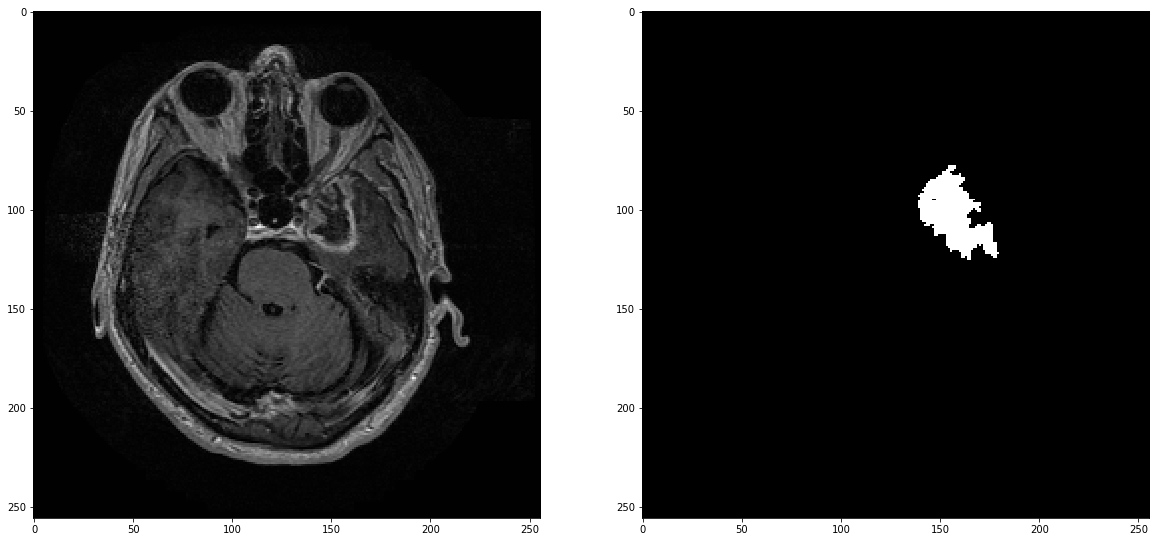

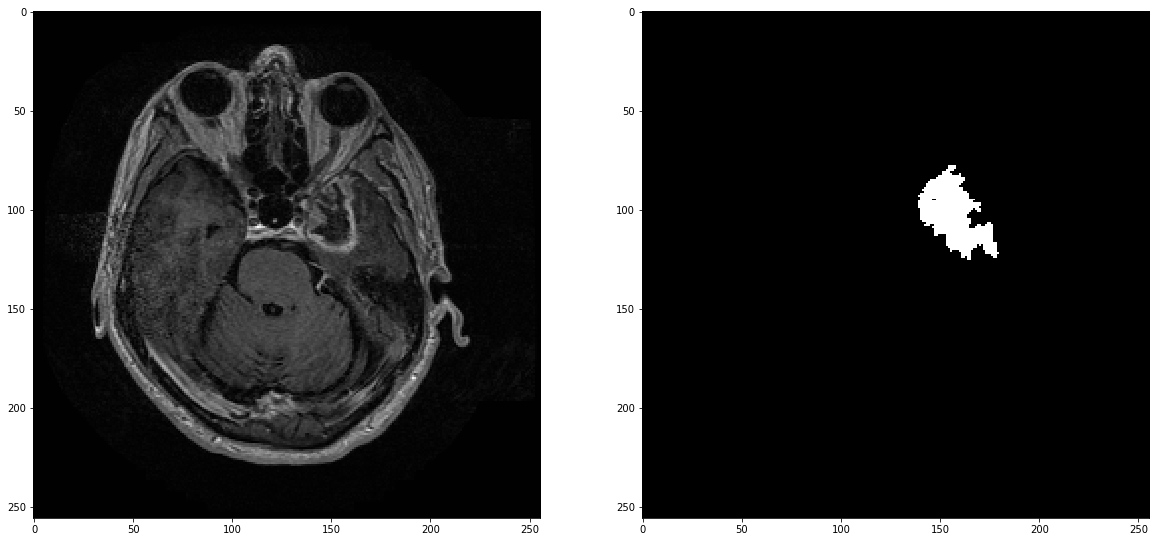

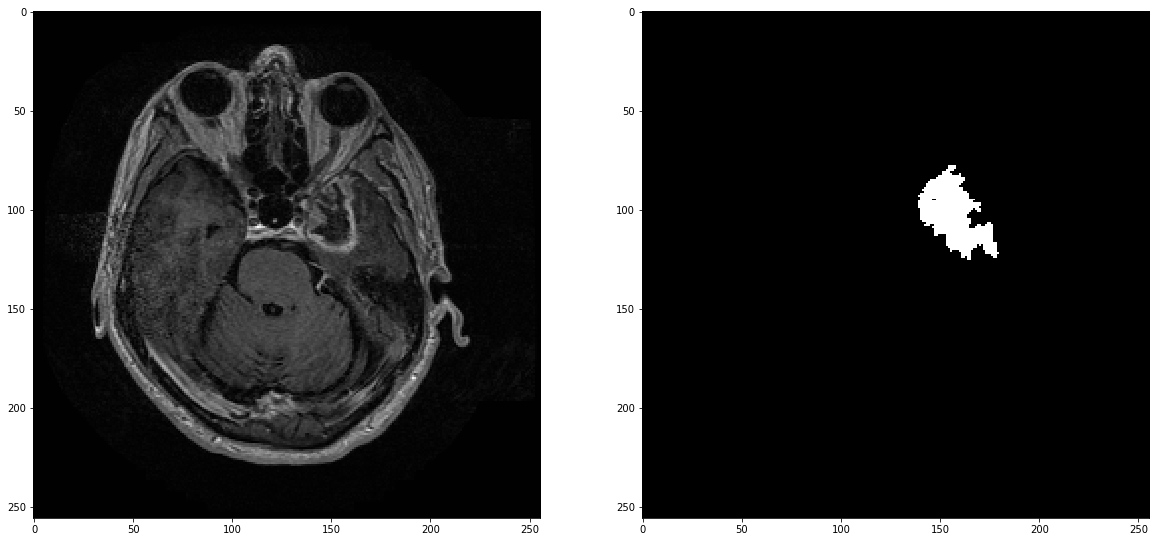

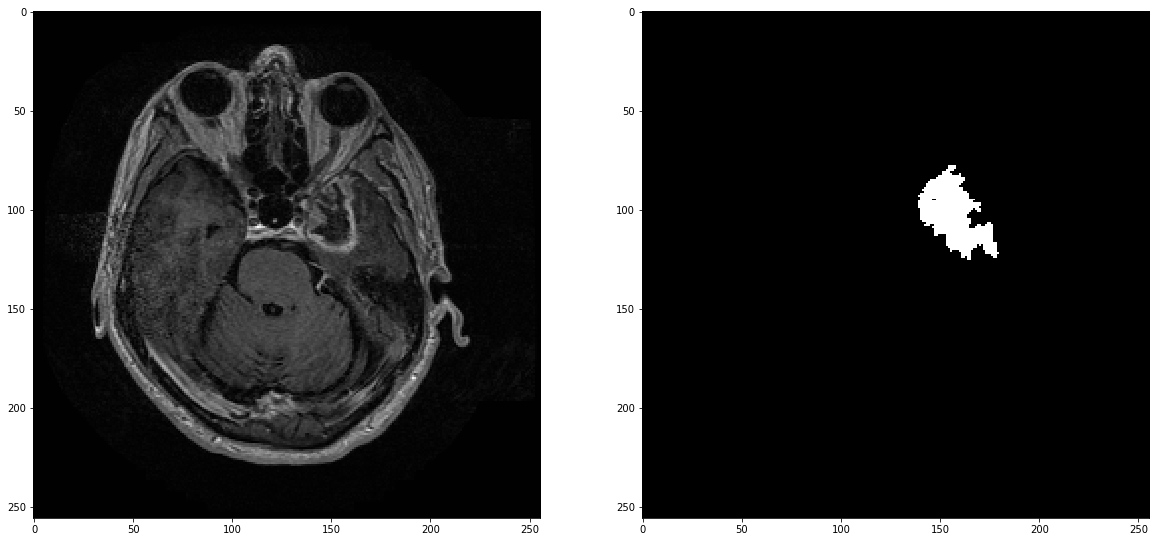

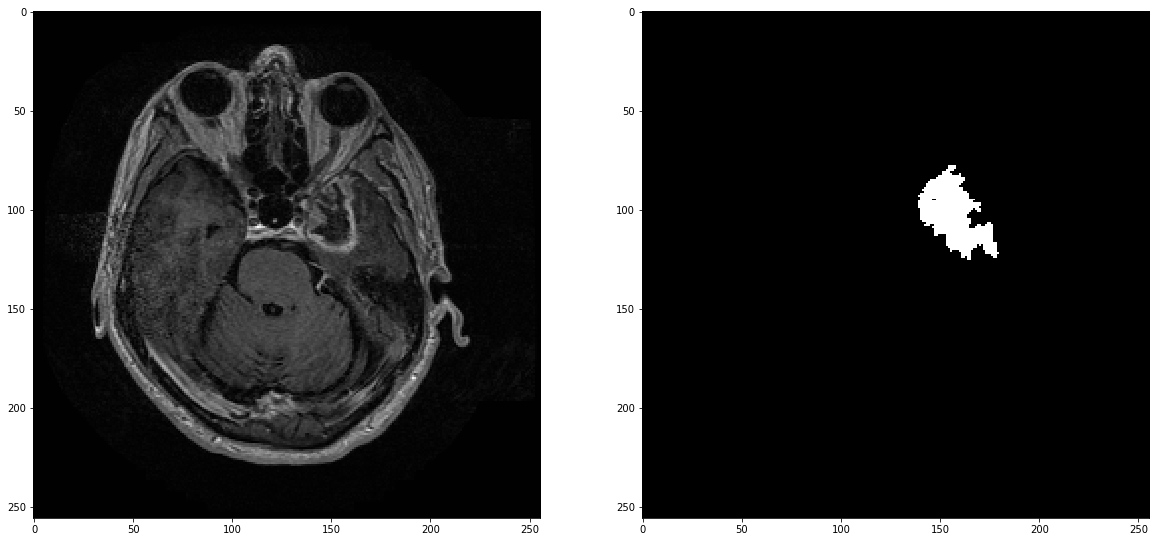

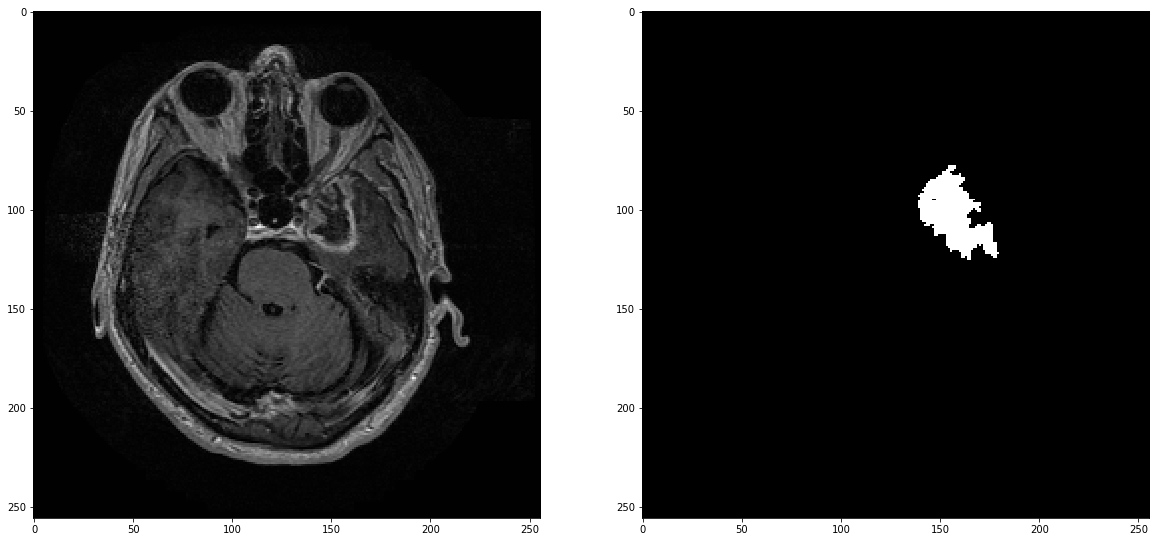

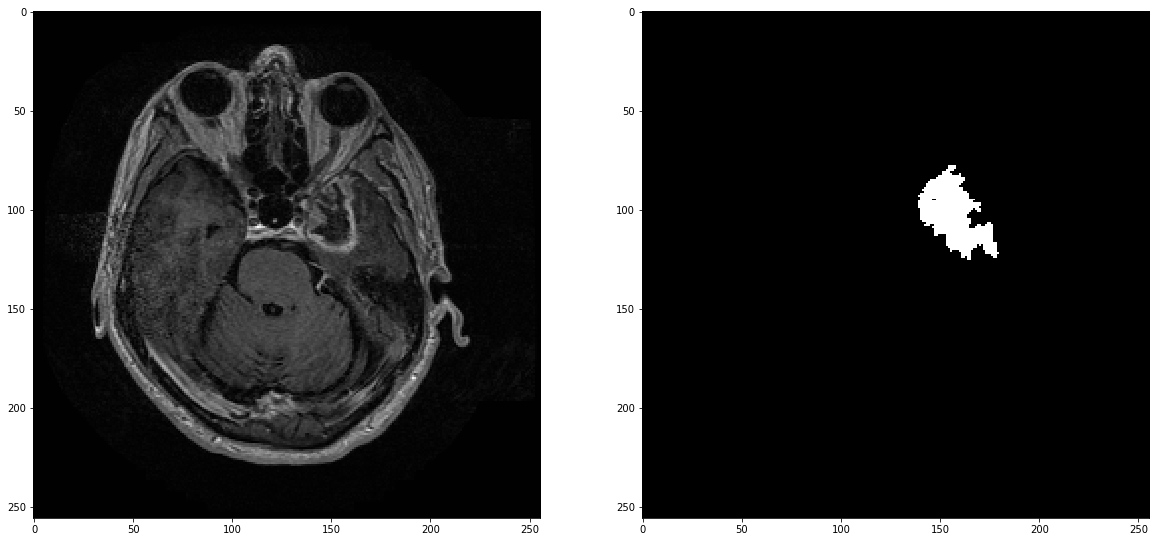

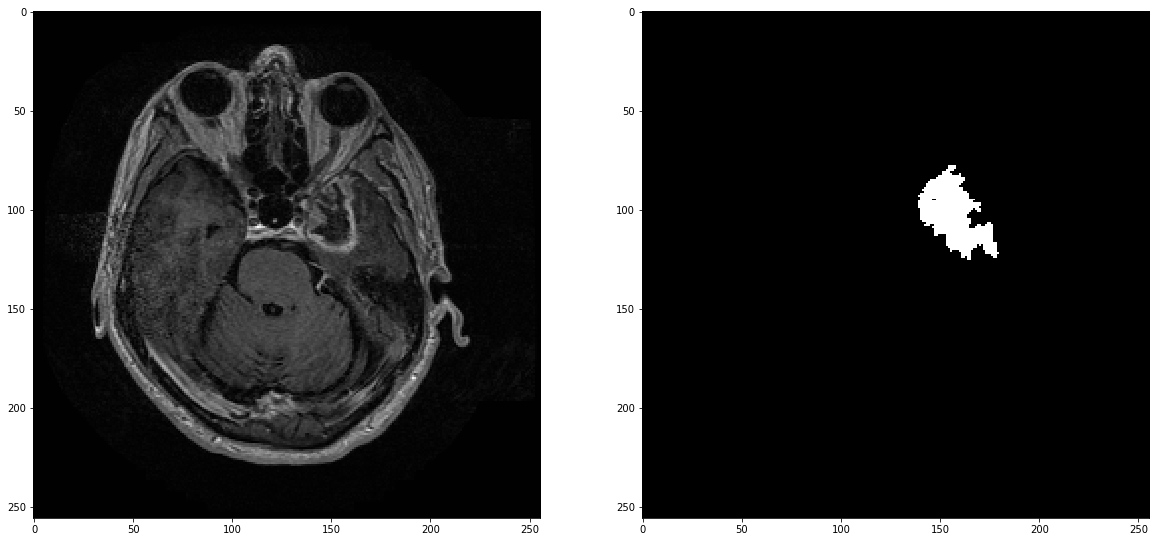

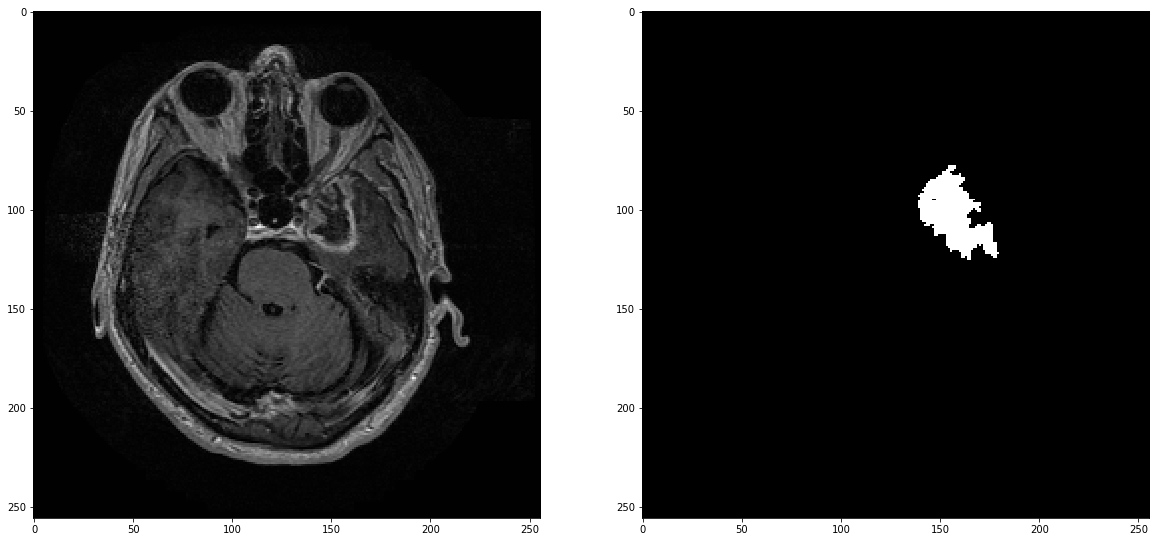

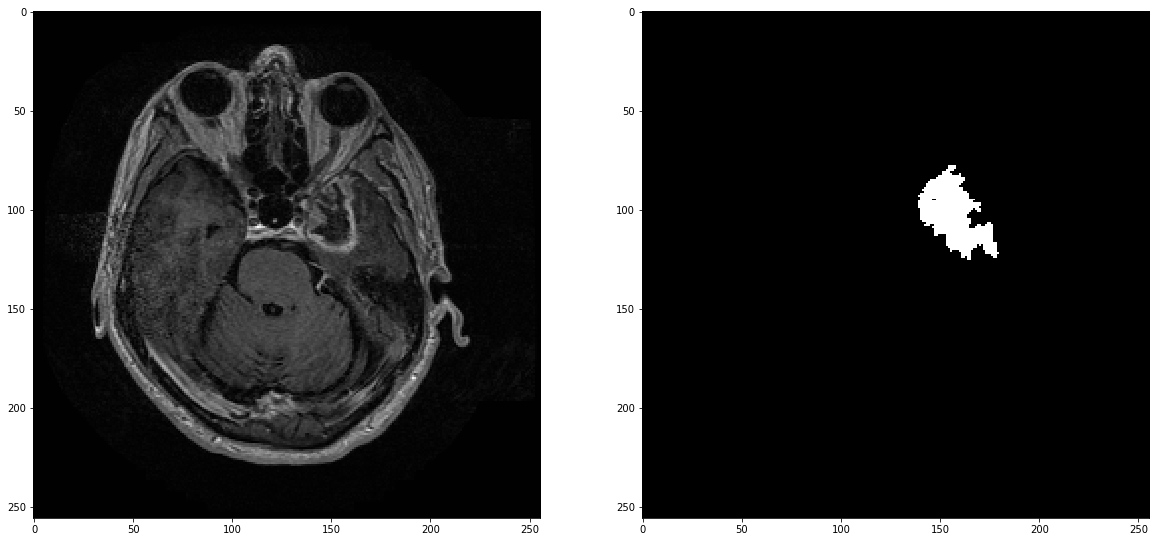

In [ ]:
result_dir = '/home/omar/Desktop/new_dsample/'
# pickle_file = open("%s.pickle" % (result_dir+file) ,"rb")
file = 'TCGA-06-0179.pickle'
final_patient_data = open("%s" % (result_dir+file), "rb")
final_data = pickle.load(final_patient_data)

# print (len(final_data[4][0]))
# print(len(final_data[4][0]))
for scan in range(len(final_data)):
    if scan != 4:
        for array in range(len(final_data[scan])):
            plt.figure(figsize=(20,10))
            plt.subplot(121)
            plt.imshow(np.squeeze(final_data[scan][array]), 'gray')
            plt.subplot(122)
            plt.imshow(np.squeeze(final_data[4][scan][array]), 'gray')
            plt.show()

# plt.figure(figsize=(20,10))
# plt.subplot(121)
# plt.imshow(np.squeeze(final_data[0][21]), 'gray')
# plt.subplot(122)
# plt.imshow(np.squeeze(final_data[4][0][21]), 'gray')
# plt.show()
# print (new_array.shape)
